# Installing Libraries

In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install statsmodels

In [2]:
#!pip install sweetviz

In [3]:
# Import Pandas
import pandas as pd

# Read the Sales Dataset
data = pd.read_csv("sales_prediction.csv")

# Display the data
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
import pandas as pd
import numpy as np

#Step 2: Check for Missing Values

missing_values = data.isnull().sum()
print(missing_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64



# HANDLING MISSING VALUES

- Use Groupby to Perform mean on Item Weight (Numerical)

- Use Groupby to Perform mode on Outlet_size ( Categorical)

In [5]:
#Step 3: Handling Missing Values, Since its a numerical feature

data['Item_Weight'] = data.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [6]:
#Step 4: Handling Missing Values, Since its a categorical feature

data['Outlet_Size'] = data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

In [7]:
# Check for missing values after Cleaning
missing_values_after_imputation = data.isnull().sum()

# Display the count of missing values for each column after imputation
print("Missing values count for each column after imputation:")
print(missing_values_after_imputation)

Missing values count for each column after imputation:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


# Exploratory Data Analysis (EDA)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9884\2260033927.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


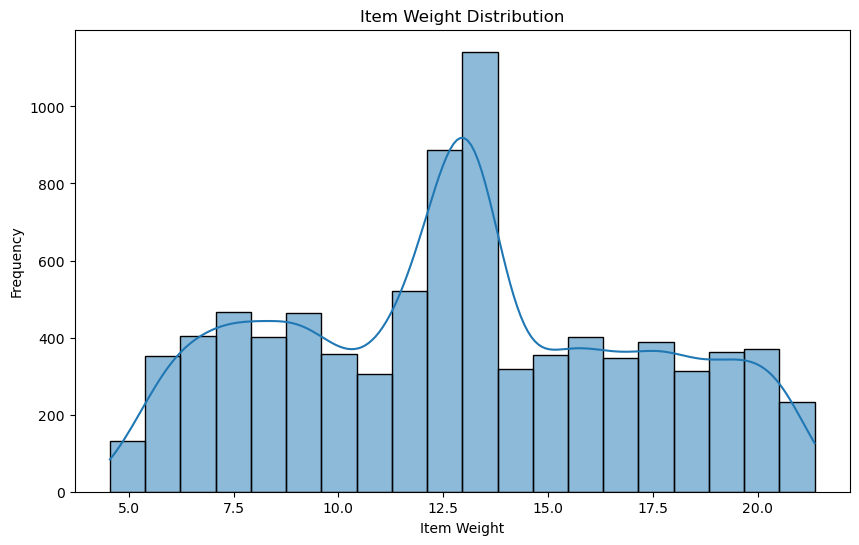

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the option to handle infinite values
pd.set_option('mode.use_inf_as_na', True)

# Distribution of Key Variables
## Item Weight Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Item_Weight'], bins=20, kde=True)
plt.title('Item Weight Distribution')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


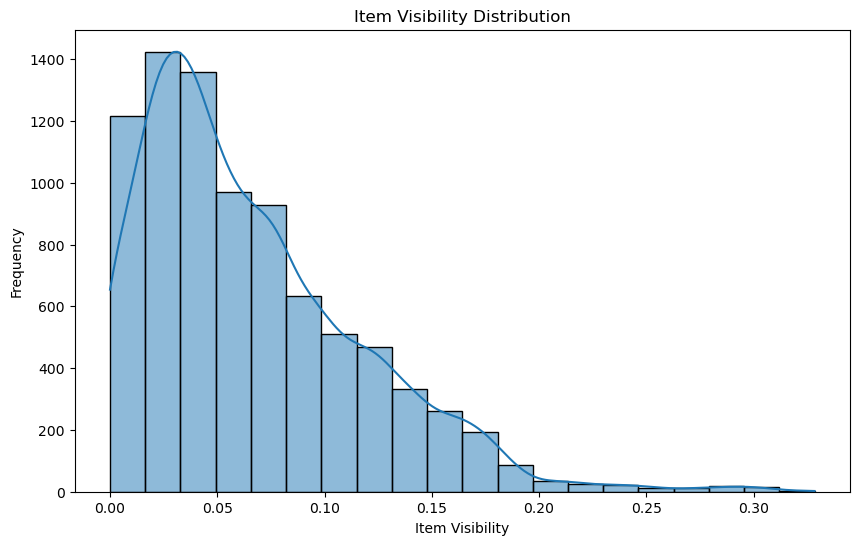

In [9]:
## Item Visibility Distribution

plt.figure(figsize=(10,6))
sns.histplot(data['Item_Visibility'], bins=20, kde=True)
plt.title('Item Visibility Distribution')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


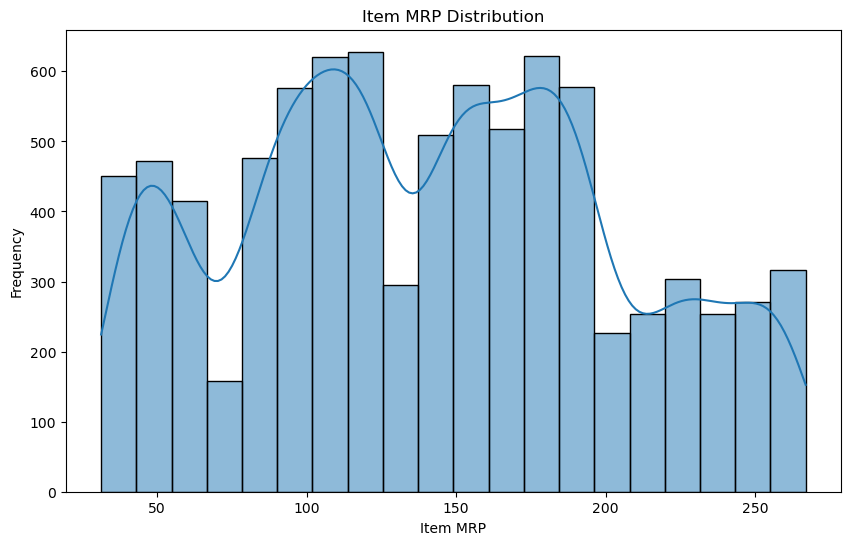

In [10]:
## Item MRP Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Item_MRP'], bins=20, kde=True)
plt.title('Item MRP Distribution')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()

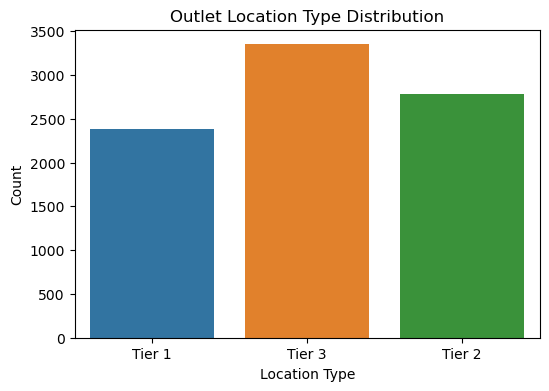

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.title('Outlet Location Type Distribution')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

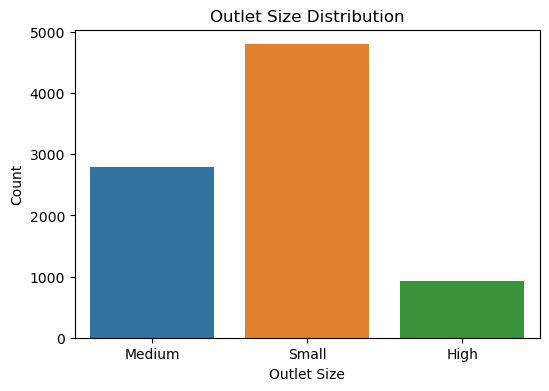

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Size')
plt.title('Outlet Size Distribution')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.show()

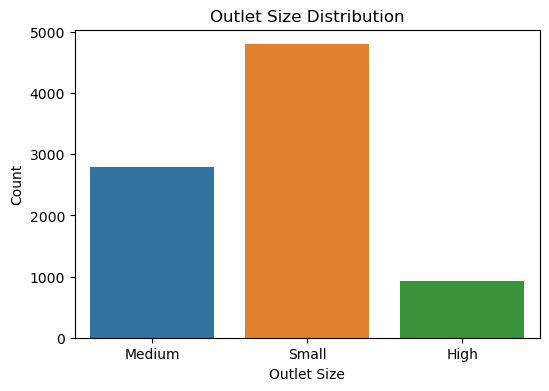

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert your numpy array to a pandas DataFrame if it's not already one
# data = pd.DataFrame(data, columns=['Outlet_Size'])

# Set the size of the figure for the plot
plt.figure(figsize=(6,4))

# Create a count plot for the 'Outlet_Size' column in the 'data' DataFrame
sns.countplot(data=data, x='Outlet_Size')

# Set the title of the plot
plt.title('Outlet Size Distribution')

# Label the x-axis as 'Outlet Size'
plt.xlabel('Outlet Size')

# Label the y-axis as 'Count'
plt.ylabel('Count')

# Display the plot
plt.show()

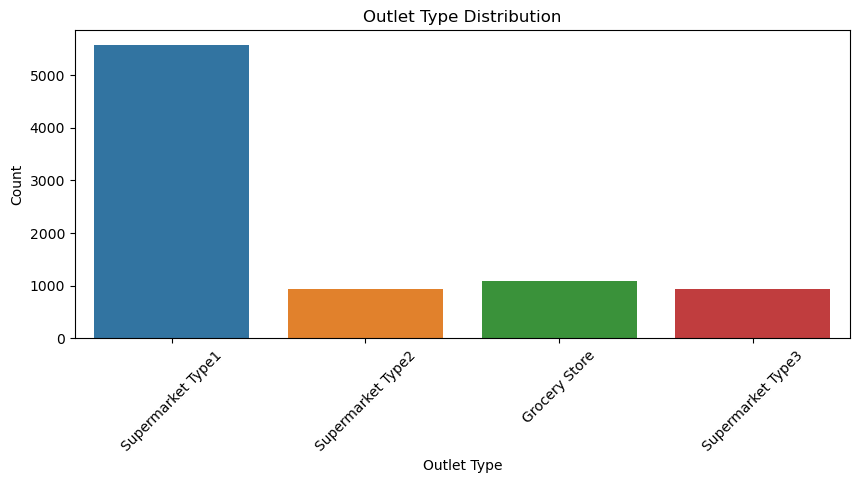

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Outlet_Type')
plt.title('Outlet Type Distribution')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

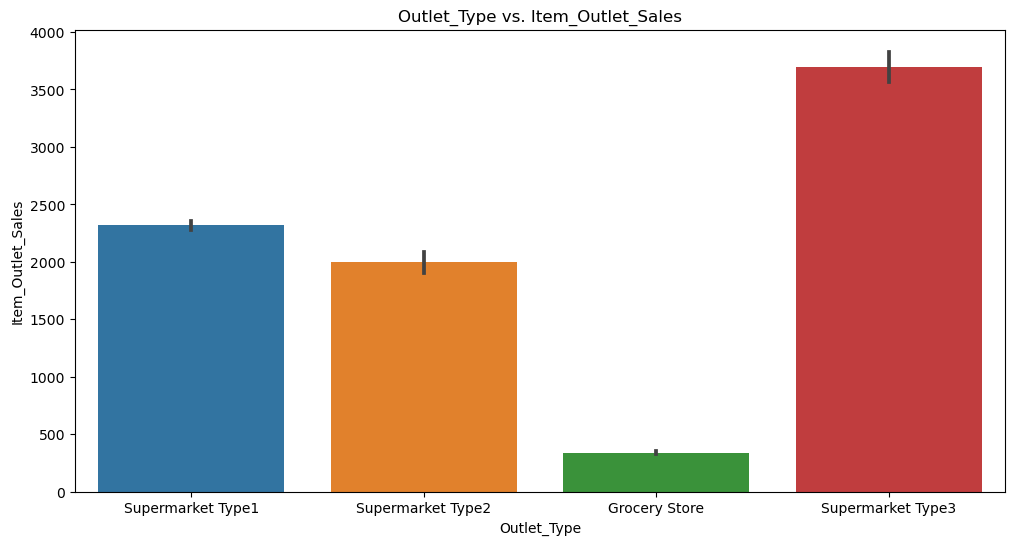

In [15]:
# Bar graph for Outlet_Type vs. Item_Outlet_Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)
plt.title('Outlet_Type vs. Item_Outlet_Sales')
plt.show()

# Numerical Variables Against Sales

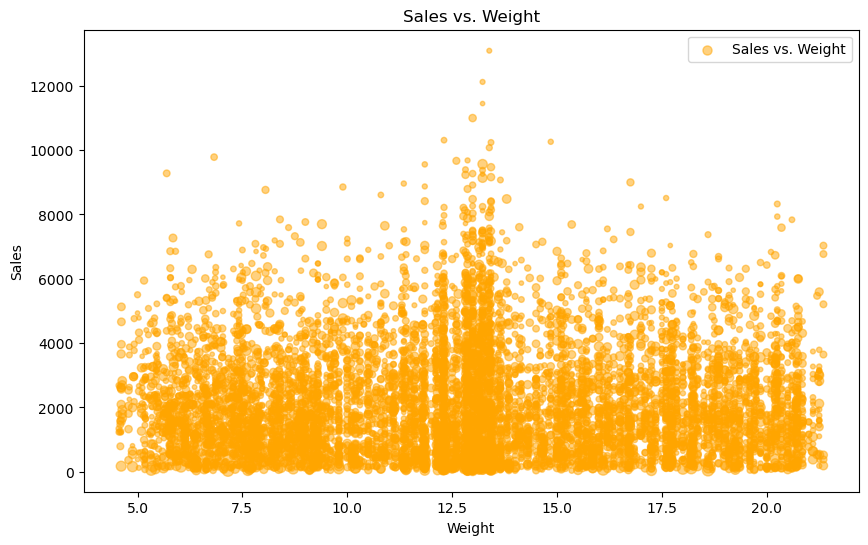

In [16]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame after imputation
plt.figure(figsize=(10, 6))

# Adjust the scale factor and set a minimum size for the bubbles
scale_factor = 200  # You can adjust this value as needed to reduce bubble size
min_size = 10  # Minimum size for the bubble

# Calculate the sizes, ensuring that each bubble has at least the minimum size
sizes = (data['Item_Visibility'] * scale_factor) + min_size

plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'], alpha=0.5,
            s=sizes, c='orange', label='Sales vs. Weight') 

plt.title('Sales vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Sales')
plt.legend()
plt.show()

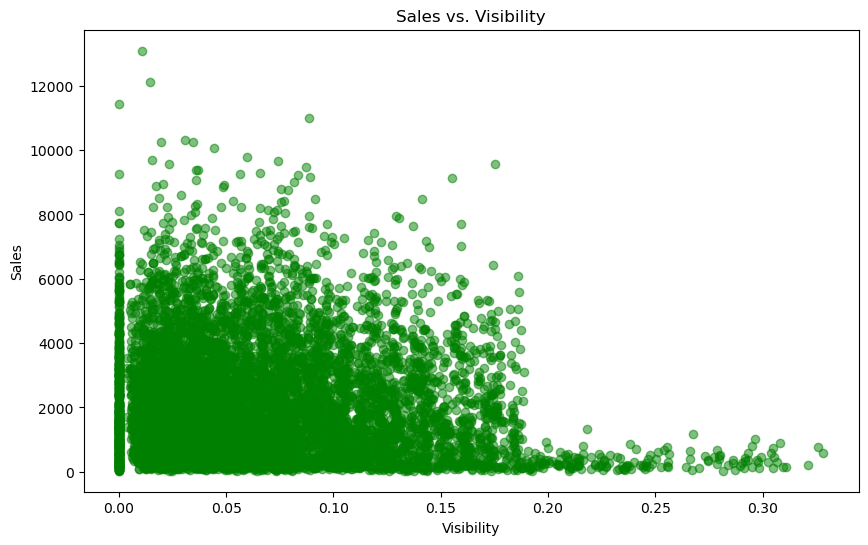

In [17]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame after imputation
plt.figure(figsize=(10, 6))

# Create a scatter plot for sales and visibility
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'], alpha=0.5, c='green')

plt.title('Sales vs. Visibility')
plt.xlabel('Visibility')
plt.ylabel('Sales')
plt.show()

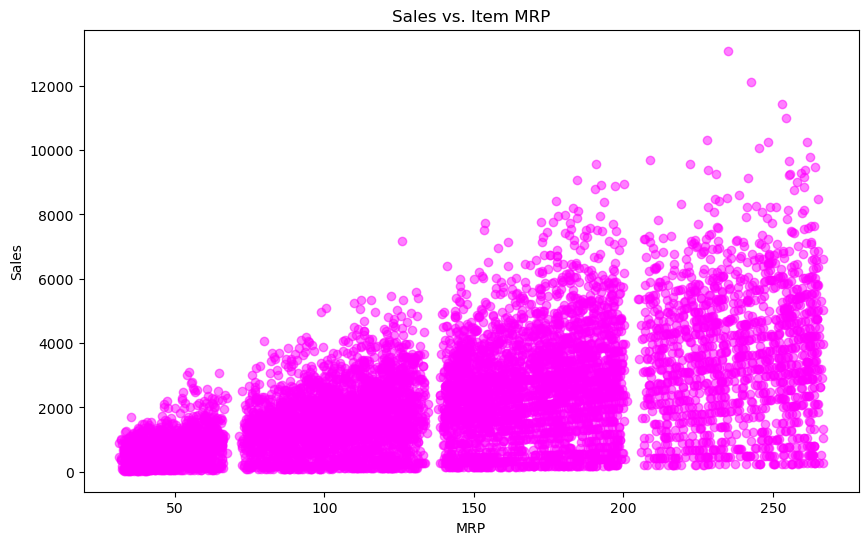

In [18]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame after imputation
plt.figure(figsize=(10, 6))

# Create a scatter plot for sales vs MRP
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'], alpha=0.5, c='magenta')

plt.title('Sales vs. Item MRP')
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.show()

# Categorical Variables Against Sales

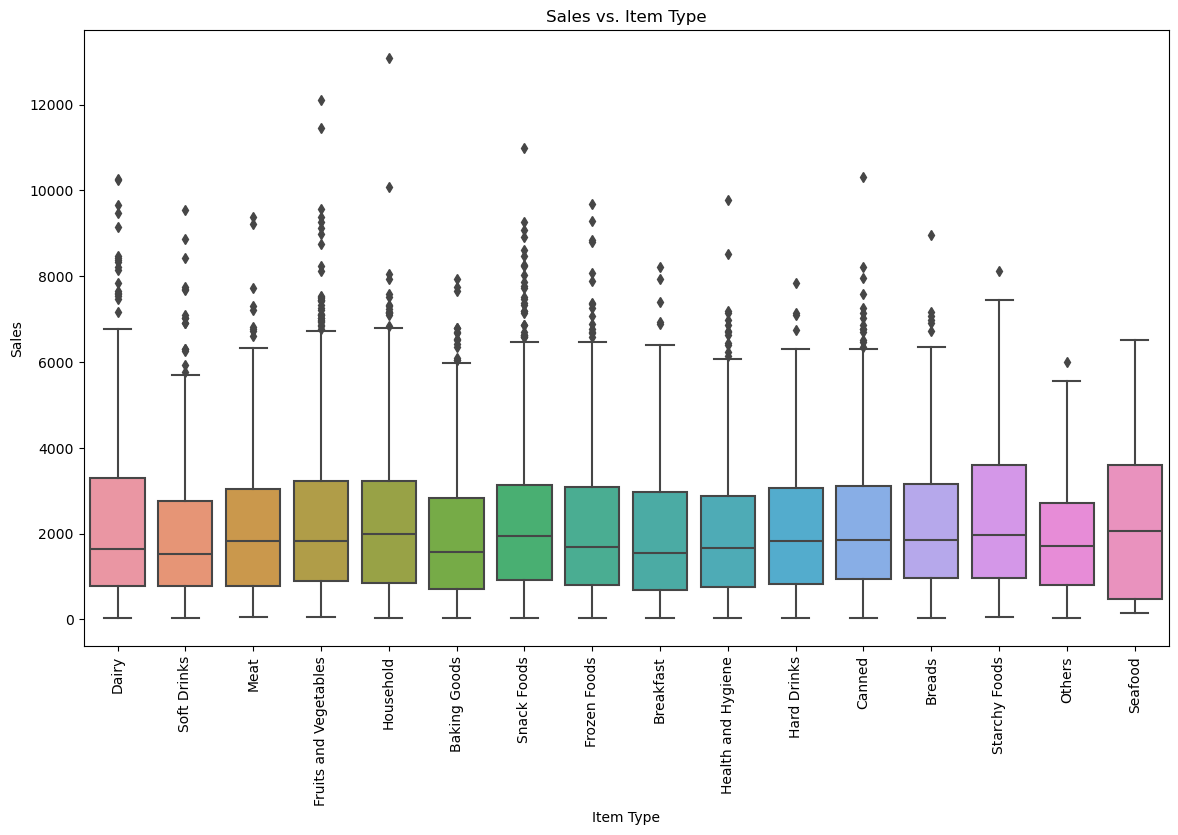

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame after imputation
plt.figure(figsize=(14, 8))

# Create a box plot for sales vs item type
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data)

plt.title('Sales vs. Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

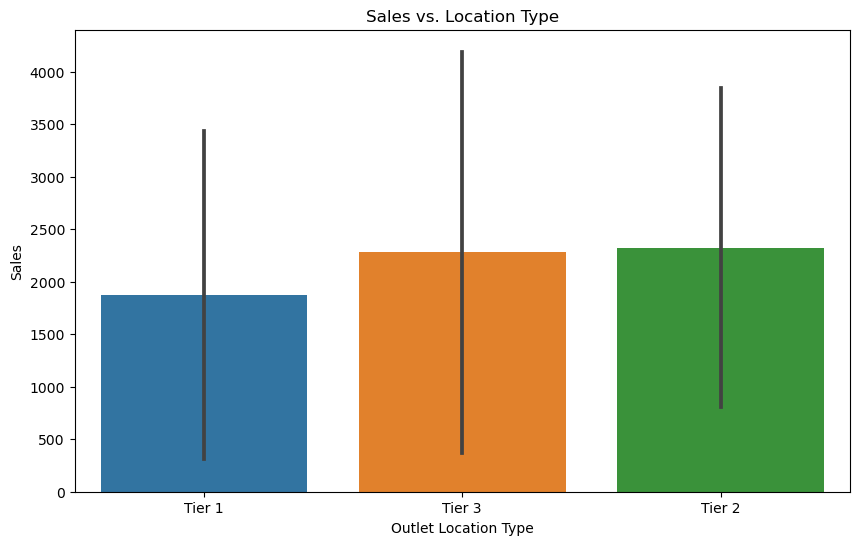

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame after imputation
plt.figure(figsize=(10, 6))

# Create a bar plot for sales vs outlet location type
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, errorbar='sd')

plt.title('Sales vs. Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')

plt.show()

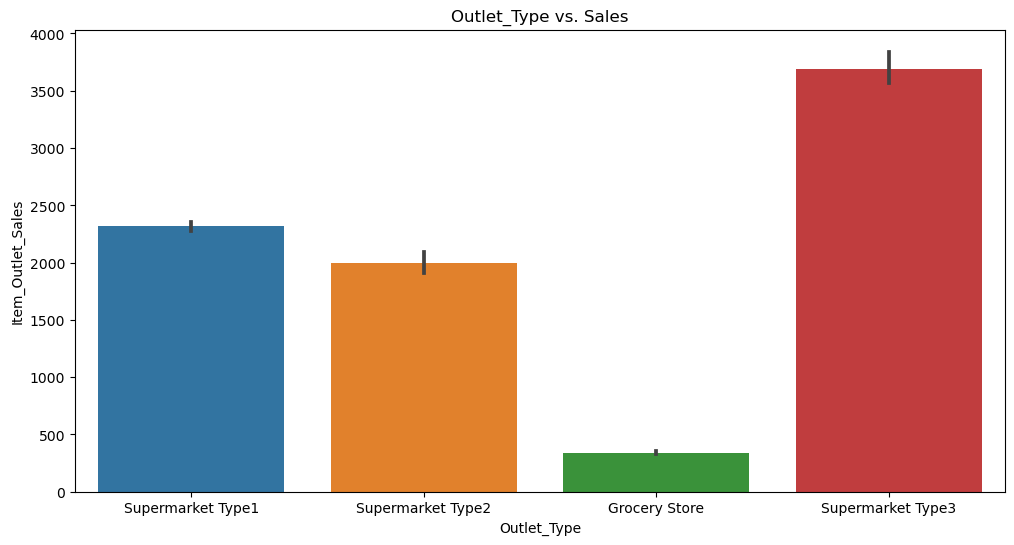

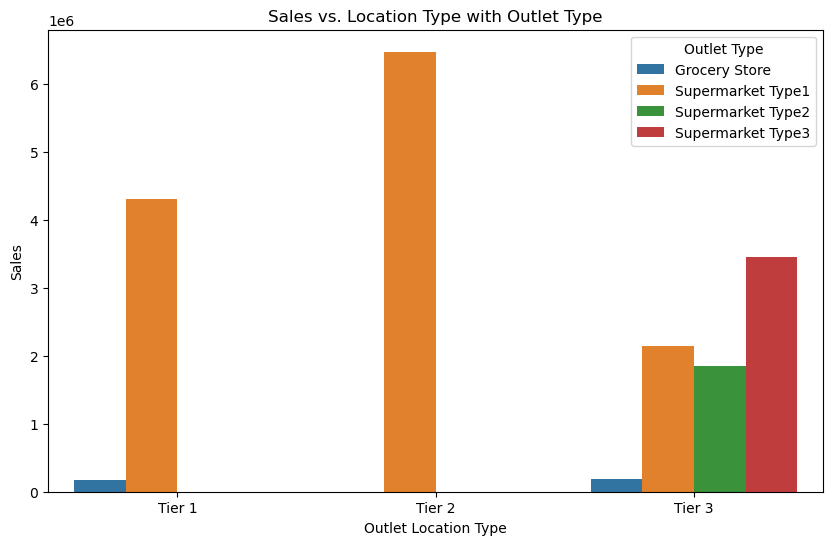

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame after imputation and that 'Outlet_Type' includes 'Grocery Store'

# First, plot Outlet_Type vs. Item_Outlet_Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)
plt.title('Outlet_Type vs. Sales')
plt.show()

# Then, plot Outlet_Location_Type vs. Item_Outlet_Sales
# If 'Outlet_Type' is related to 'Outlet_Location_Type', you may need to aggregate sales
# for the 'Grocery Store' type for each 'Outlet_Location_Type'
plt.figure(figsize=(10, 6))

# Assuming that there's a mapping between 'Outlet_Type' and 'Outlet_Location_Type'
# Aggregate the sales based on 'Outlet_Location_Type' and keep 'Outlet_Type' information
# For example, if 'Grocery Store' is an 'Outlet_Type' that can be in any 'Outlet_Location_Type', aggregate accordingly
grouped_data = data.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].sum().reset_index()

# Now, create a bar plot for sales vs outlet location type including 'Grocery Store' information
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type', data=grouped_data, errorbar='sd')

plt.title('Sales vs. Location Type with Outlet Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')

# Display legend
plt.legend(title='Outlet Type')

plt.show()

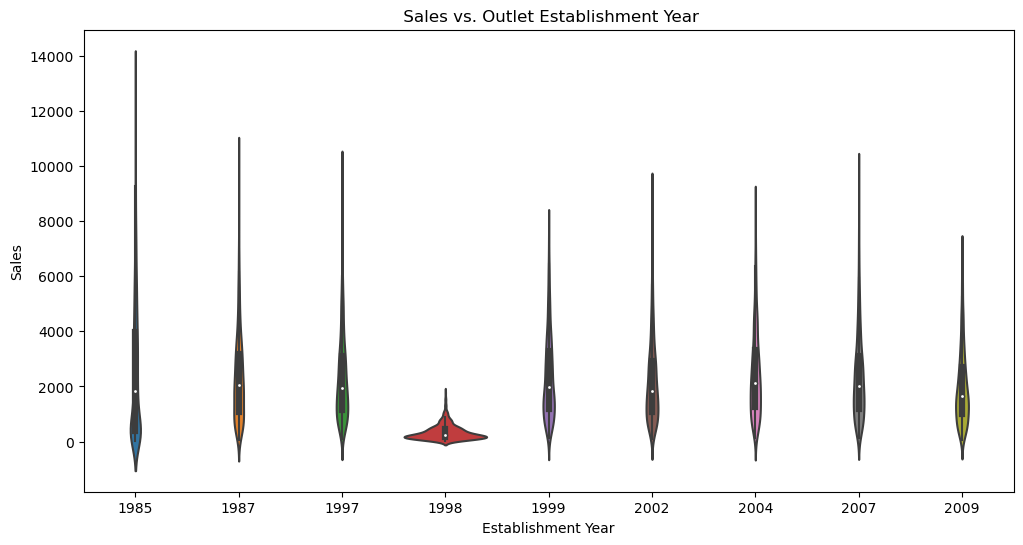

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame after imputation
plt.figure(figsize=(12, 6))

# Create a violin plot for sales vs outlet establishment year
sns.violinplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=data)

plt.title(' Sales vs. Outlet Establishment Year')
plt.xlabel('Establishment Year')
plt.ylabel('Sales')

plt.show()

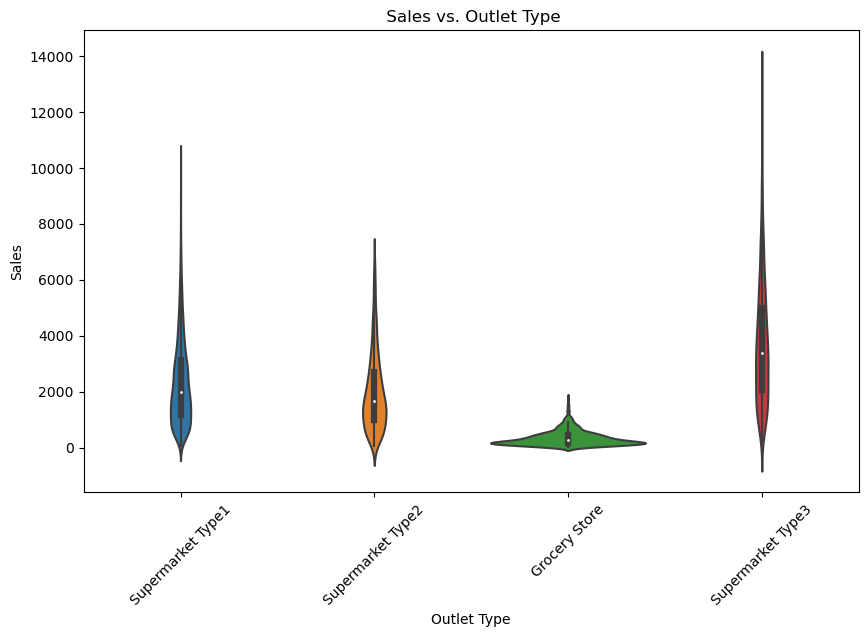

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame after imputation
plt.figure(figsize=(10, 6))

# Create a violin plot for sales vs outlet type
sns.violinplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)

plt.title(' Sales vs. Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Sales')

plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

plt.show()

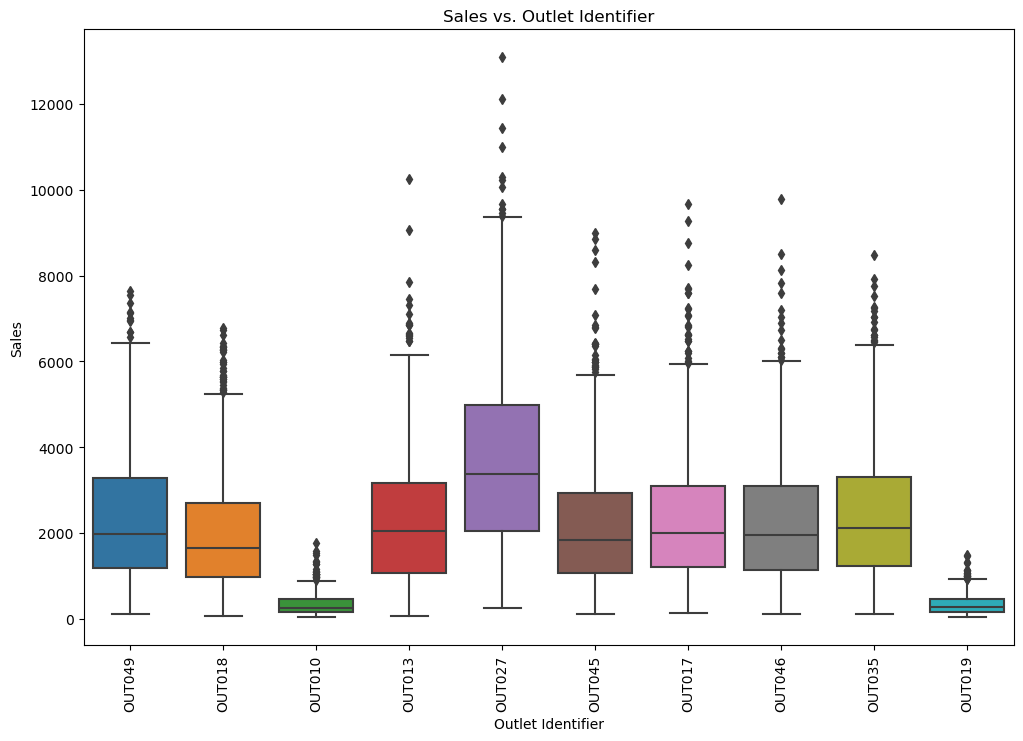

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Outlet_Identifier' is the column with the outlet identifiers
plt.figure(figsize=(12, 8))

# Create a box plot for sales vs outlet identifier
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data)

plt.title('Sales vs. Outlet Identifier')
plt.xlabel('Outlet Identifier')
plt.ylabel('Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability
plt.show()

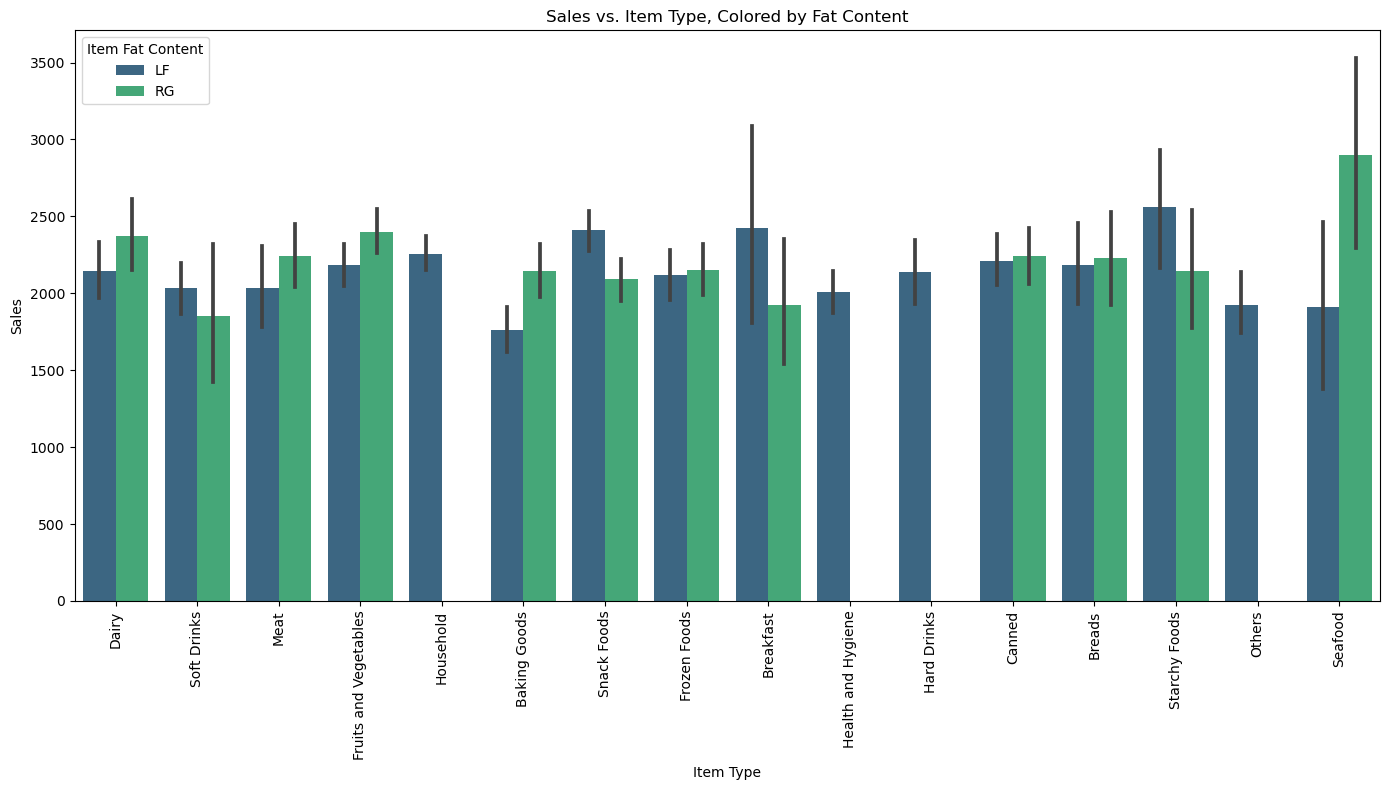

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# 'Item_Type' is the column with the type of items
# 'Item_Outlet_Sales' is the column with the sales data
# 'Item_Fat_Content' is the column with the fat content data

# Normalize the Item_Fat_Content column to have consistent naming, if needed
fat_content_normalization = {
    'low fat': 'LF',
    'Low Fat': 'LF',
    'Regular': 'RG',
    'reg': 'RG',
    # Add any other normalization rules you may need
}

# Replace the Item_Fat_Content column with the normalized values
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(fat_content_normalization)

plt.figure(figsize=(14, 8))

# Create a bar plot for sales vs item type filled by fat content
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=data, palette='viridis')

plt.title('Sales vs. Item Type, Colored by Fat Content')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.legend(title='Item Fat Content')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

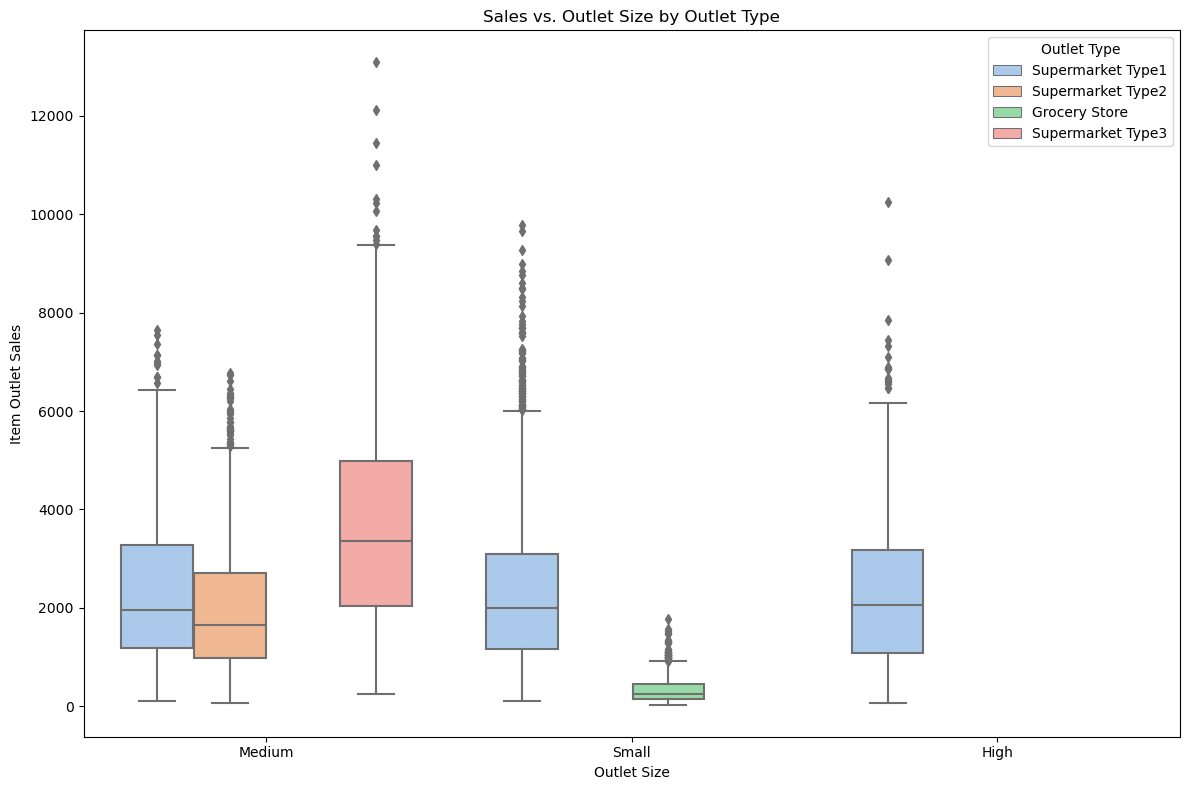

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# 'Outlet_Size' is the column with the size of the outlet
# 'Outlet_Type' is the column with the type of the outlet
# 'Item_Outlet_Sales' is the column with the sales data

plt.figure(figsize=(12, 8))

# Create a box plot for sales vs outlet size, filled by outlet type
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Type', data=data, palette='pastel')

plt.title('Sales vs. Outlet Size by Outlet Type')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')

plt.legend(title='Outlet Type')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [27]:
import pandas as pd

# Assuming 'data' is your DataFrame and it has columns 'Outlet_Identifier' and 'Outlet_Size'

# Getting the unique pairs of Outlet_Identifier and their Outlet_Size
unique_outlet_sizes = data[['Outlet_Identifier', 'Outlet_Size']].drop_duplicates()

# Sorting the DataFrame for better visualization
unique_outlet_sizes = unique_outlet_sizes.sort_values(by=['Outlet_Identifier', 'Outlet_Size'])


# If you are not in a Jupyter environment, use the print function:
display(unique_outlet_sizes)

,Outlet_Identifier,Outlet_Size
3,OUT010,Small
4,OUT013,High
9,OUT017,Small
1,OUT018,Medium
23,OUT019,Small
7,OUT027,Medium
19,OUT035,Small
8,OUT045,Small
11,OUT046,Small
0,OUT049,Medium


# CHECKING FOR OUTLIERS

Number of outliers in Item_MRP: 0
Number of outliers in Item_Visibility: 144
Number of outliers in Item_Weight: 0


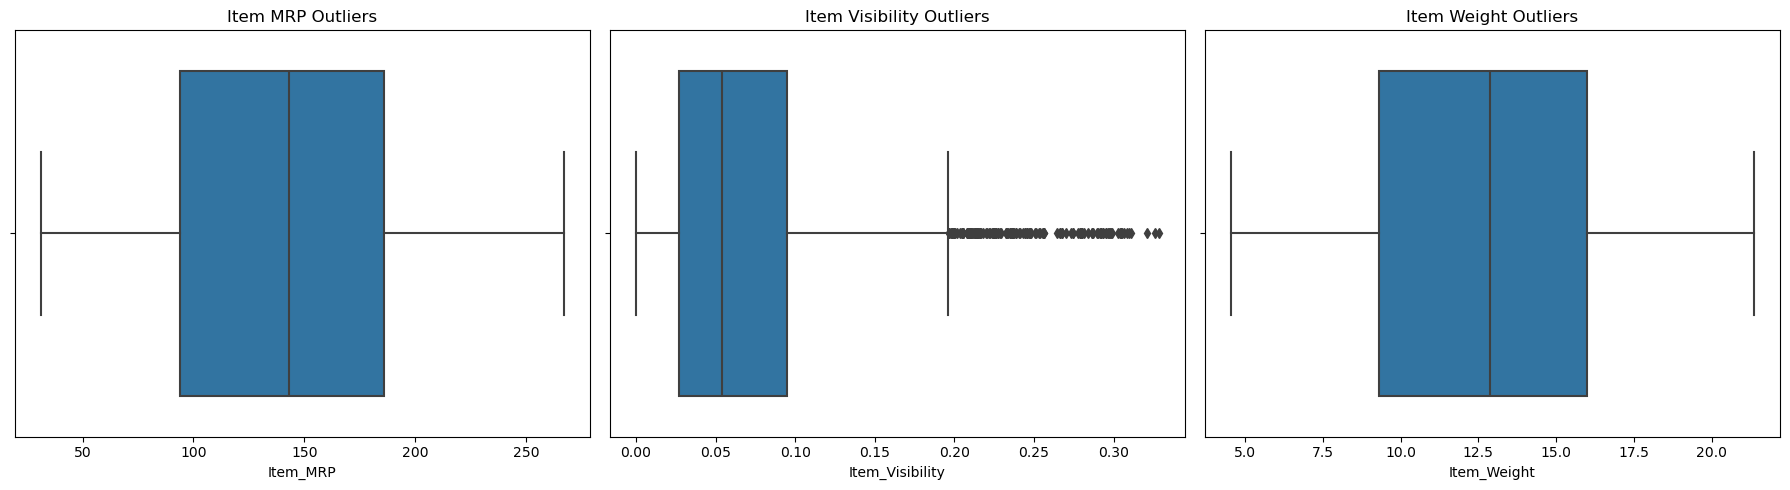

In [28]:
import pandas as pd

# Assuming 'data' is your DataFrame
# And it contains 'Item_MRP', 'Item_Visibility', and 'Item_Weight' as continuous variables

# Function to detect outliers in a DataFrame column
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return a boolean Series where True indicates the presence of an outlier
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Applying the outlier detection for each column
outliers_mrp = detect_outliers_iqr(data, 'Item_MRP')
outliers_visibility = detect_outliers_iqr(data, 'Item_Visibility')
outliers_weight = detect_outliers_iqr(data, 'Item_Weight')

# You can now use the boolean series to filter the outliers from the original data if needed
# For example, to get the DataFrame of outliers for 'Item_MRP':
outliers_mrp_df = data[outliers_mrp]

# Print the number of outliers detected in each variable
print(f"Number of outliers in Item_MRP: {outliers_mrp.sum()}")
print(f"Number of outliers in Item_Visibility: {outliers_visibility.sum()}")
print(f"Number of outliers in Item_Weight: {outliers_weight.sum()}")

# If you want to visualize the outliers, you can use boxplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='Item_MRP')
plt.title('Item MRP Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='Item_Visibility')
plt.title('Item Visibility Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='Item_Weight')
plt.title('Item Weight Outliers')

plt.tight_layout()
plt.show()

## FEATURE ENGINEERING

In [29]:
import pandas as pd

# FEATURE ENGINEERING 

# Outlet_Age
data['Outlet_Age'] = 2024 - data['Outlet_Establishment_Year']

# Item_Visibility_MeanRatio
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Type')
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility'] / visibility_avg.loc[x['Item_Type']], axis=1)

# Item_Type_Combined
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

# Item_Fat_Content_Corrected
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

# Broad_Category
food_types = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast']
data['Broad_Category'] = data['Item_Type'].apply(lambda x: 'Food' if x in food_types else 'Non-Food')

# Perishable
perishable = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods', 'Snack Foods', 'Breakfast']
data['Perishable'] = data['Item_Type'].apply(lambda x: 1 if x in perishable else 0)

# Creating a dataframe for the modified dataset
modified_data = pd.DataFrame(data)

# Displaying the dataframe
display(modified_data.head(6))


# Save the DataFrame to a CSV file
modified_data.to_csv("modified_data_exported.csv", index=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_MeanRatio,Item_Type_Combined,Broad_Category,Perishable
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25,0.221565,Food,Food,1
1,DRC01,5.920,RG,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15,0.301353,Drinks,Non-Food,0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25,0.269092,Food,Food,1
3,FDX07,19.200,RG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,26,0.000000,Food,Food,1
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37,0.000000,Non-Consumable,Non-Food,0
5,FDP36,10.395,RG,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,15,0.000000,Food,Food,1


# Correlation Matrix

Item_Weight                  0.012088
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Outlet_Age                   0.049135
Item_Visibility_MeanRatio   -0.129515
Perishable                   0.016204
Name: Item_Outlet_Sales, dtype: float64


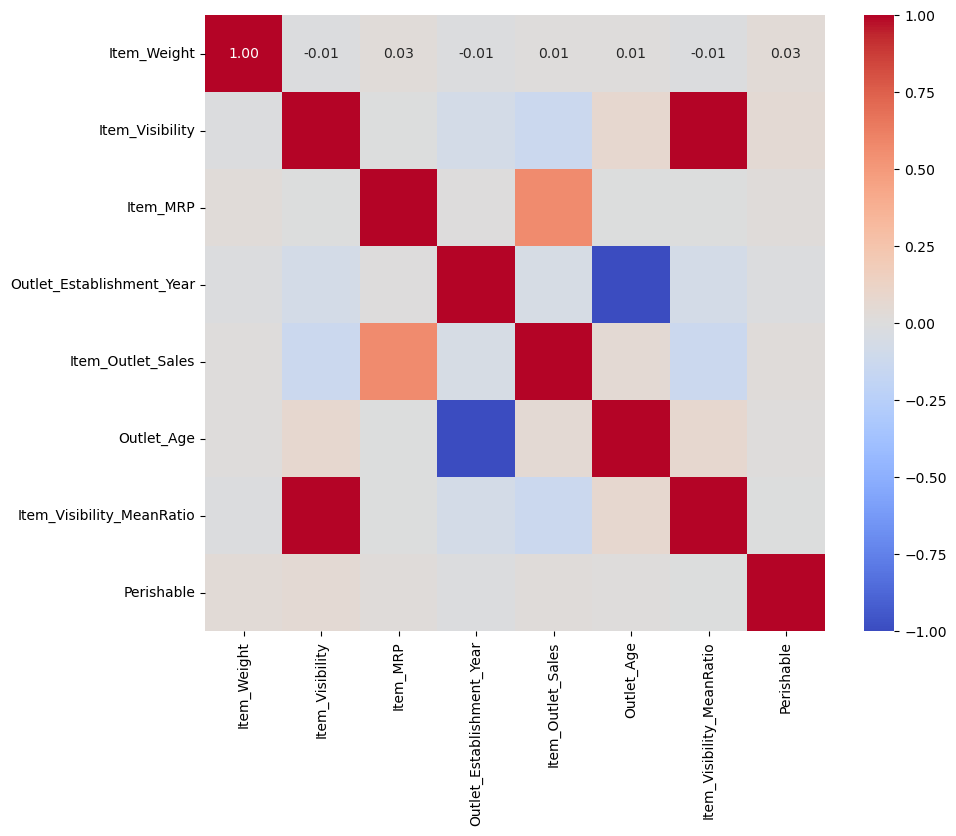

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'modified_data' contains the categorical columns 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type'

# Generate dummy variables for the categorical features
outlet_identifier_dummies = pd.get_dummies(modified_data['Outlet_Identifier'], prefix='Outlet_ID', drop_first=True)
outlet_size_dummies = pd.get_dummies(modified_data['Outlet_Size'], prefix='Outlet_Size', drop_first=True)
outlet_type_dummies = pd.get_dummies(modified_data['Outlet_Type'], prefix='Outlet_Type', drop_first=True)

# Concatenate the dummy variables with the modified_data DataFrame
data_with_dummies = pd.concat([modified_data, outlet_identifier_dummies, outlet_size_dummies, outlet_type_dummies], axis=1)

# Drop the original categorical columns from 'data_with_dummies' to avoid duplicate columns
data_with_dummies = data_with_dummies.drop(['Outlet_Identifier', 'Outlet_Size', 'Outlet_Type'], axis=1)

# Select only numeric data types for the correlation matrix
numeric_data_with_dummies = data_with_dummies.select_dtypes(include=[np.number])

# Calculate the correlation matrix using only numeric data
corr_matrix = numeric_data_with_dummies.corr()

# Select the relevant correlations
sales_correlations = corr_matrix['Item_Outlet_Sales'].drop('Item_Outlet_Sales')  # exclude self-correlation

# Print correlations related to sales
print(sales_correlations)

# Plot the correlation matrix focusing on 'Item_Outlet_Sales' correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# APPLY LOG TRANFORMATION

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness before log transformation: 1.18
Skewness after log transformation: -0.88


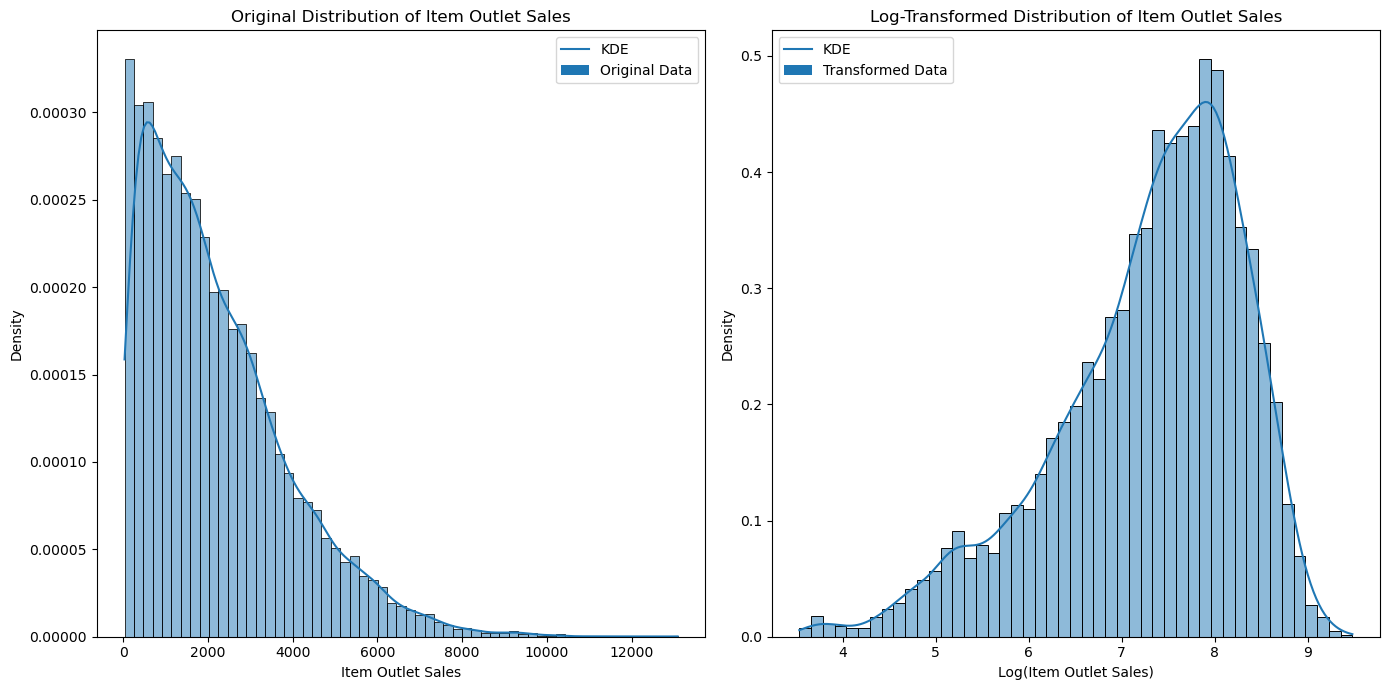

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming 'modified_data' is a preloaded pandas DataFrame with the column 'Item_Outlet_Sales'

# Visualize the original distribution of the target variable
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(modified_data['Item_Outlet_Sales'], kde=True, stat="density")
plt.title("Original Distribution of Item Outlet Sales")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Density")
plt.legend(["KDE", "Original Data"])

# Apply log transformation to the target variable 'Item_Outlet_Sales'
modified_data['Item_Outlet_Sales_Log'] = np.log1p(modified_data['Item_Outlet_Sales'])

# Visualize the distribution of the log-transformed target variable
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(modified_data['Item_Outlet_Sales_Log'], kde=True, stat="density")
plt.title("Log-Transformed Distribution of Item Outlet Sales")
plt.xlabel("Log(Item Outlet Sales)")
plt.ylabel("Density")
plt.legend(["KDE", "Transformed Data"])

# Get the skewness of the original and transformed data
original_skewness = modified_data['Item_Outlet_Sales'].skew()
transformed_skewness = modified_data['Item_Outlet_Sales_Log'].skew()
print(f"Skewness before log transformation: {original_skewness:.2f}")
print(f"Skewness after log transformation: {transformed_skewness:.2f}")

# Show the plots side by side
plt.tight_layout()
plt.show()

# View the Modified_Dataset Using Sweetviz:¶

                                             |          | [  0%]   00:00 -> (? left)


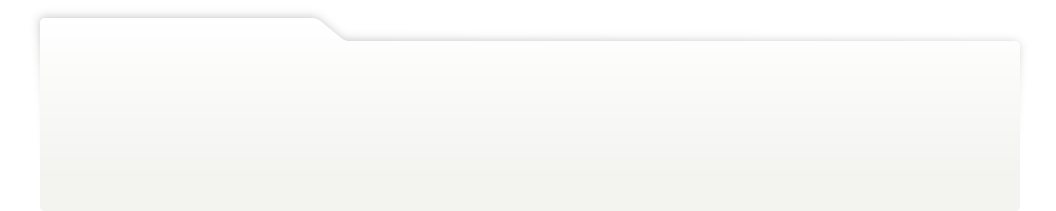
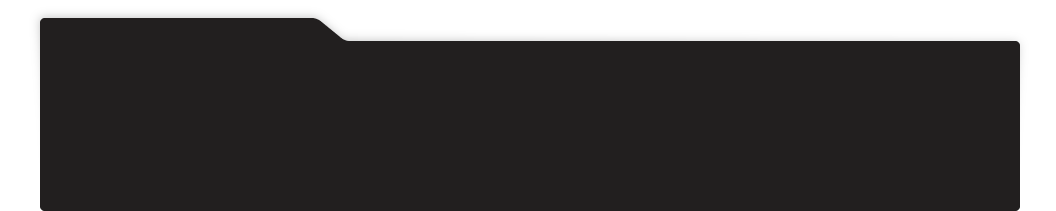
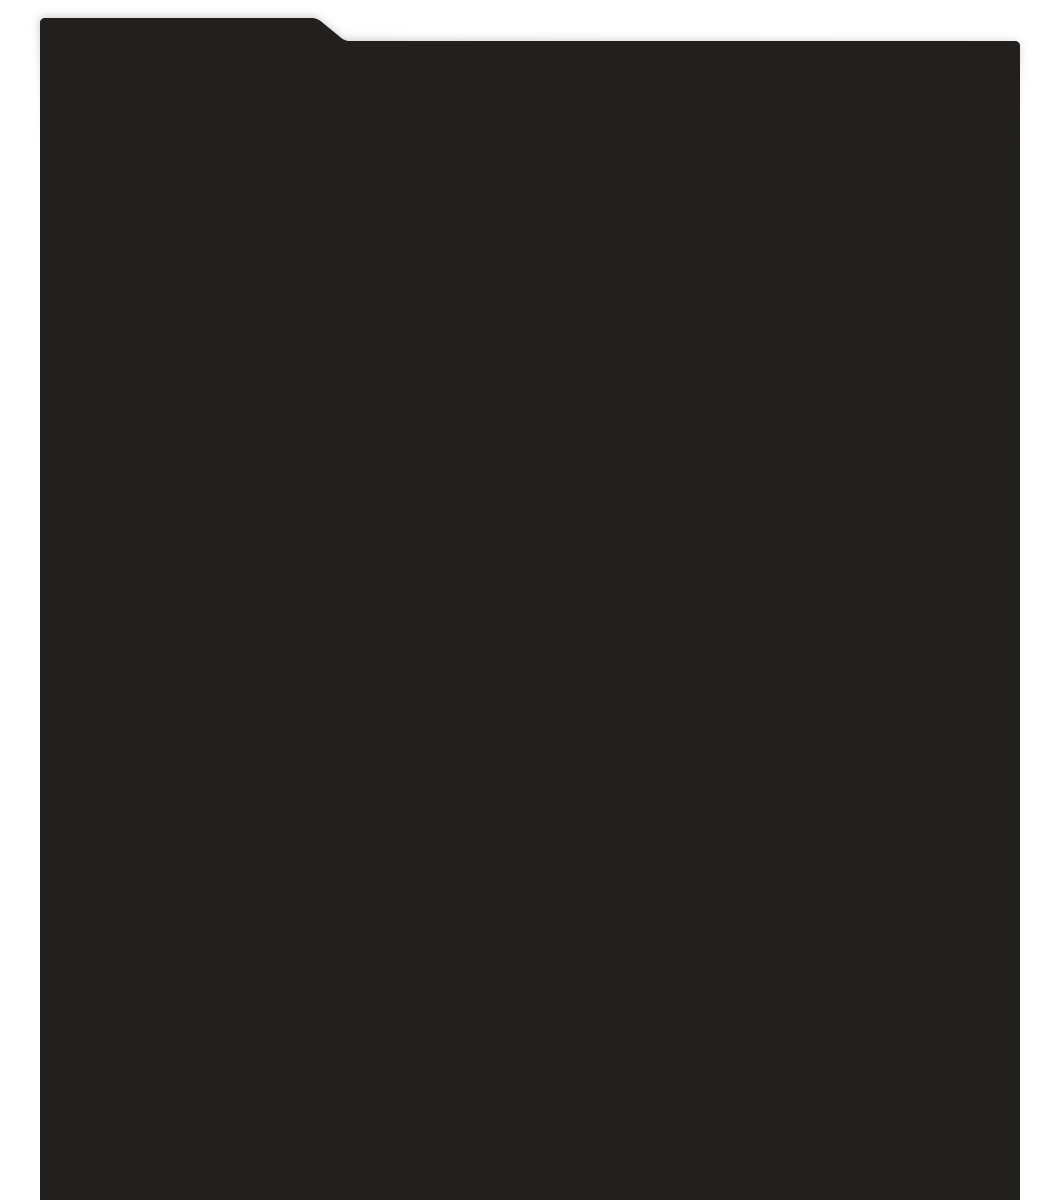
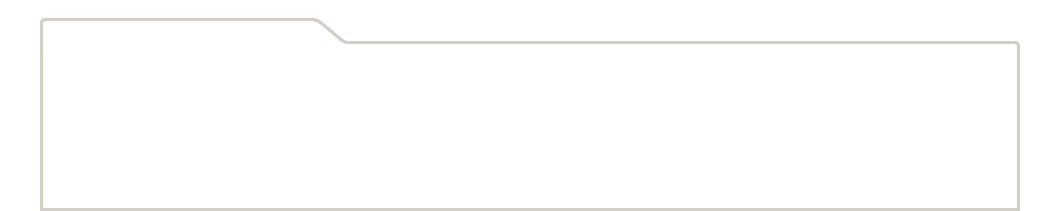
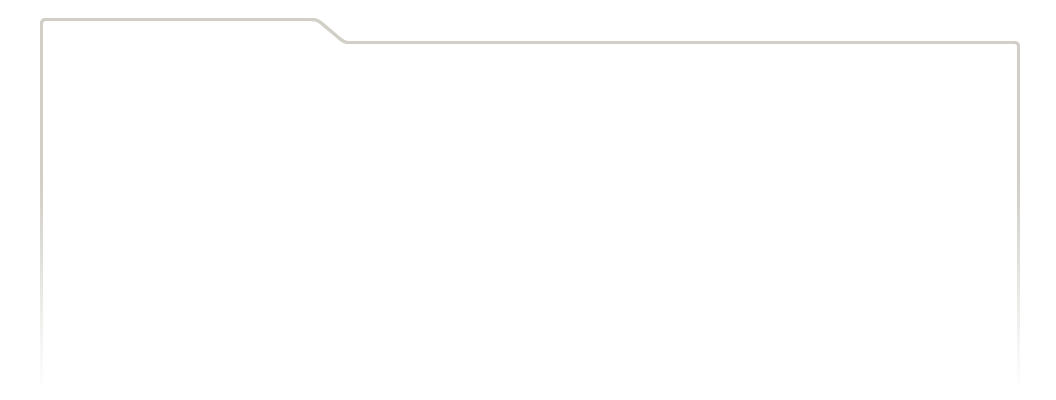
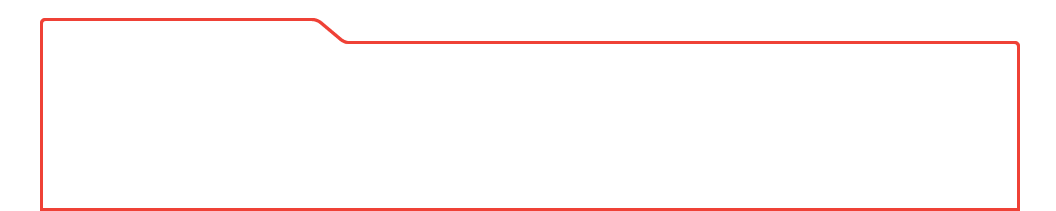
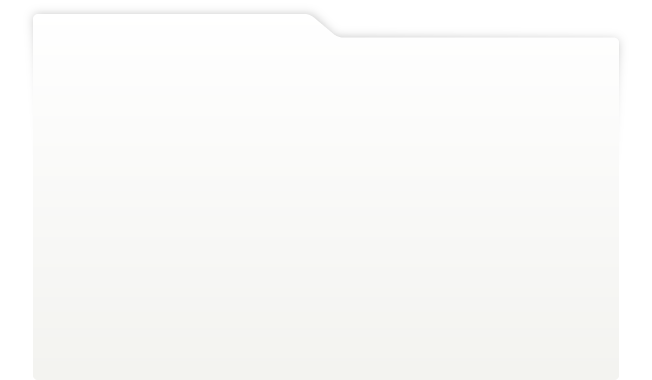
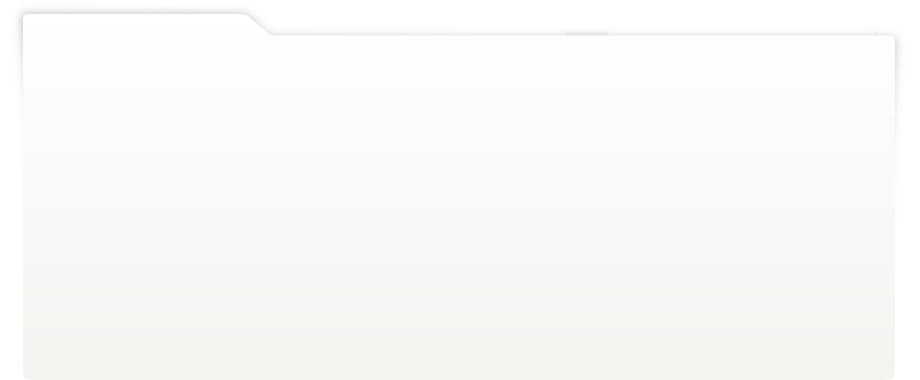
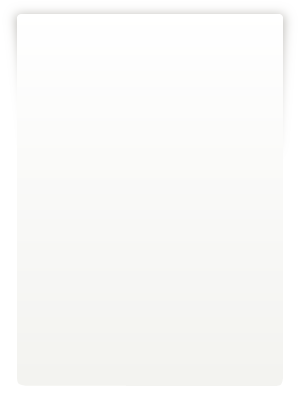
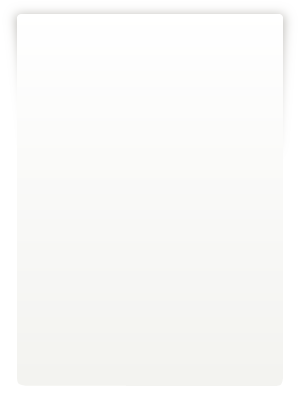
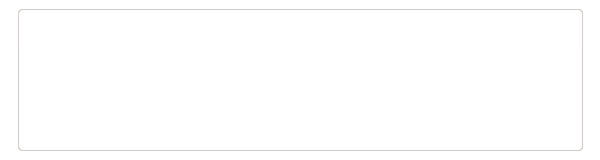
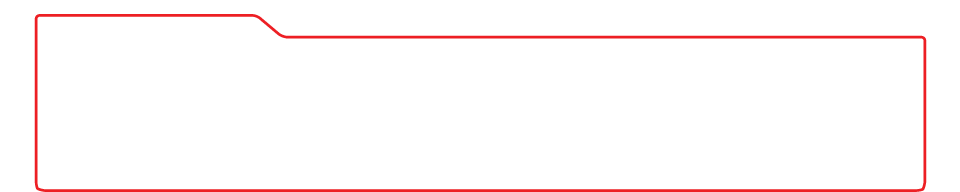
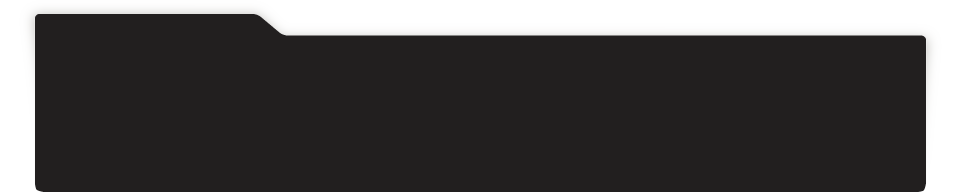
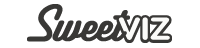
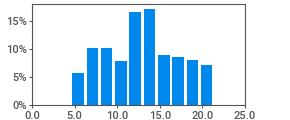
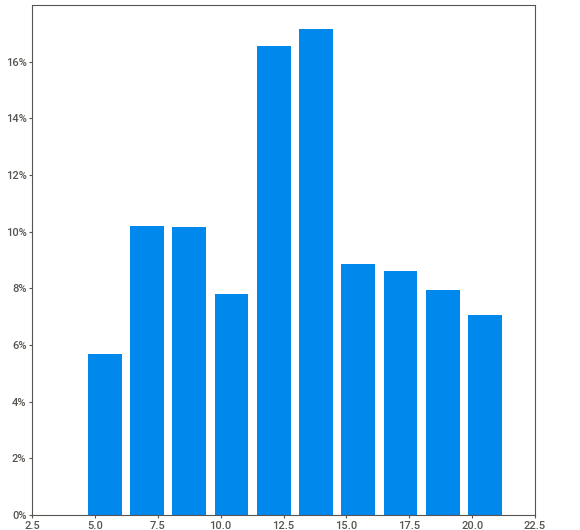
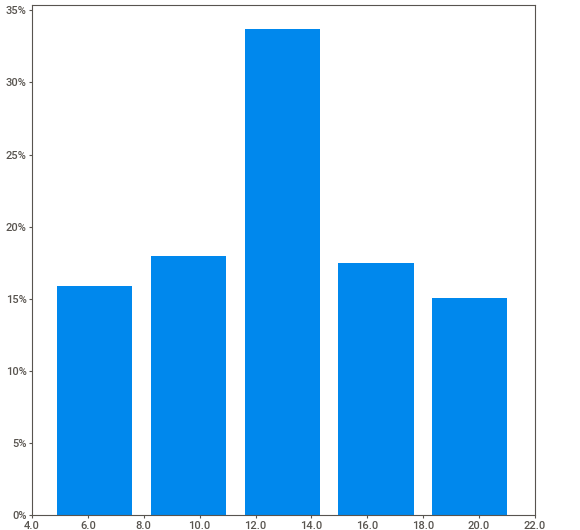
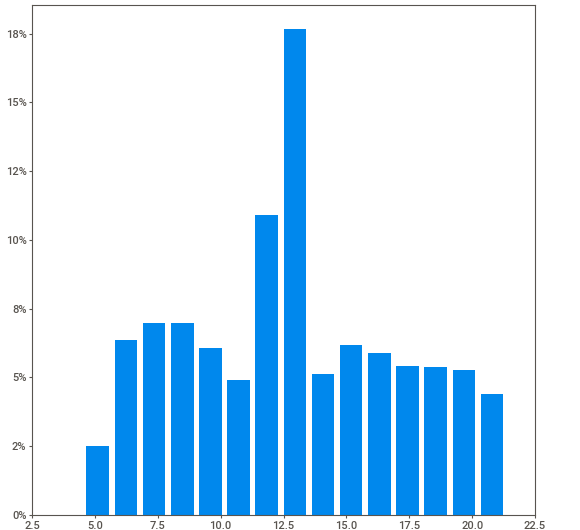
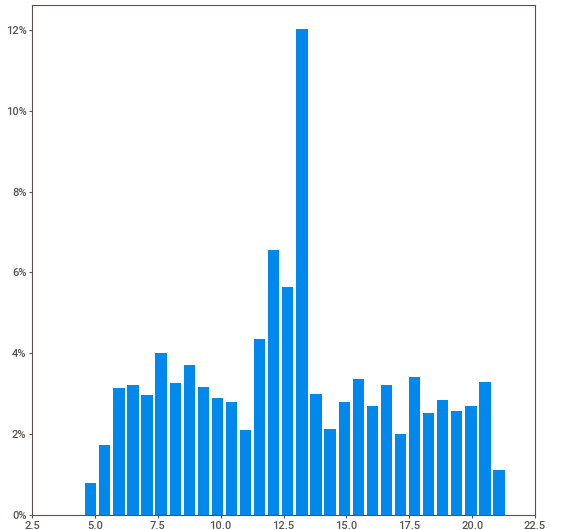
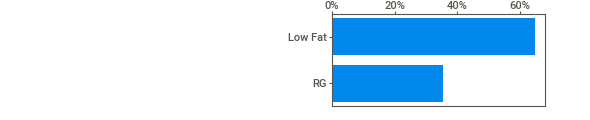
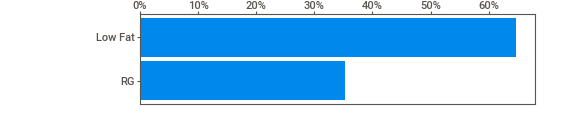
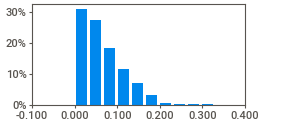
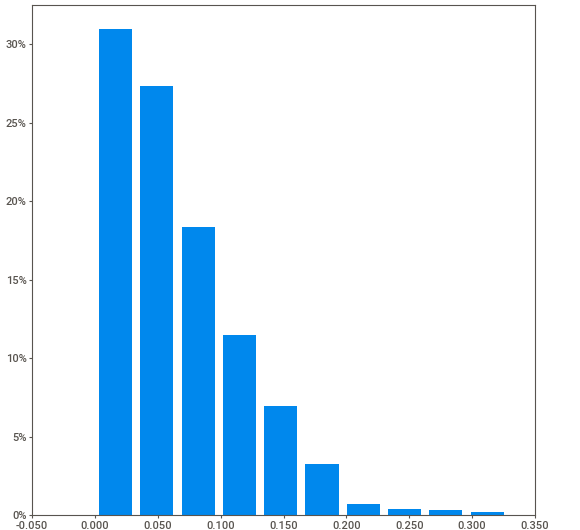
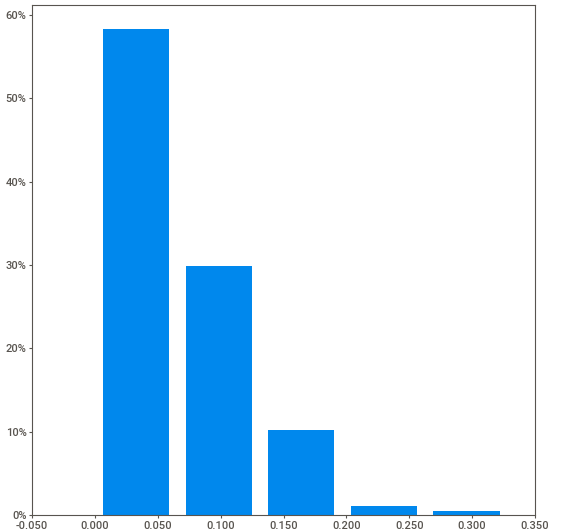
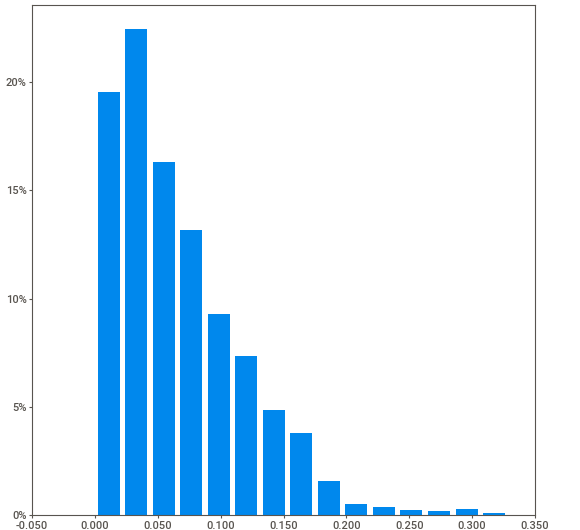
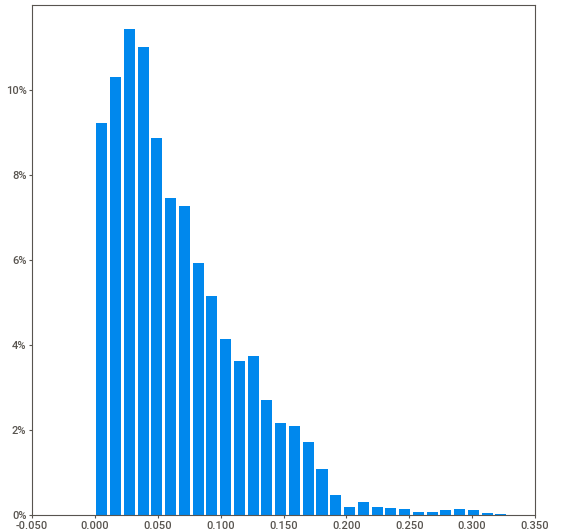
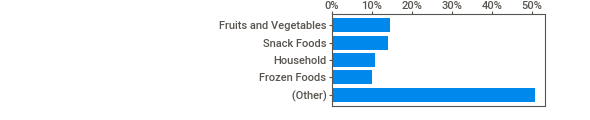
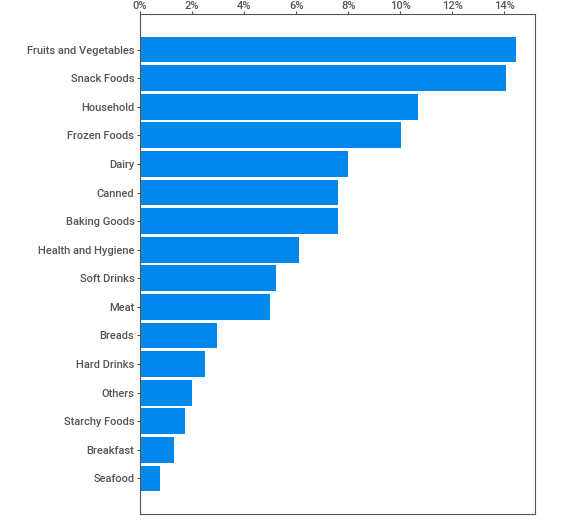
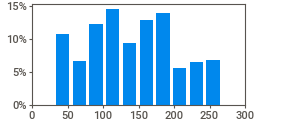
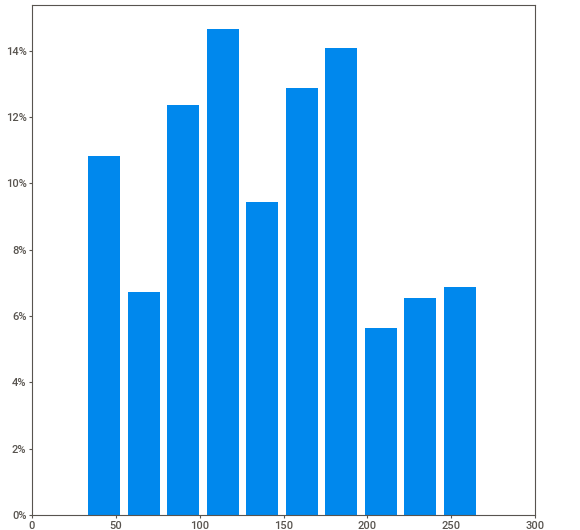
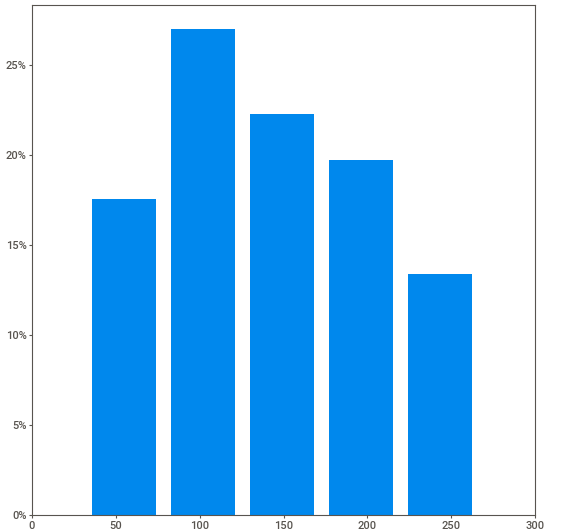
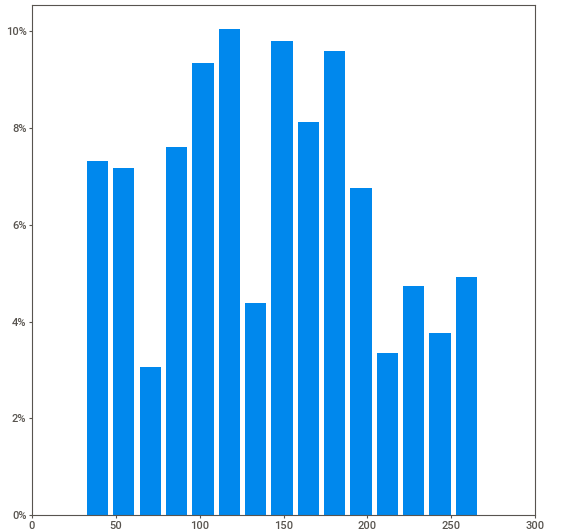
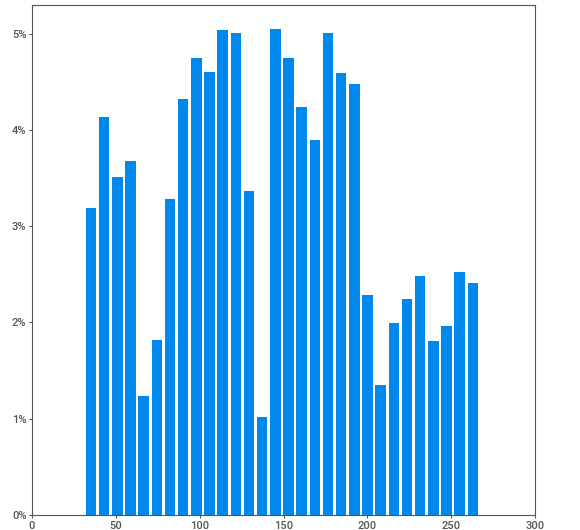
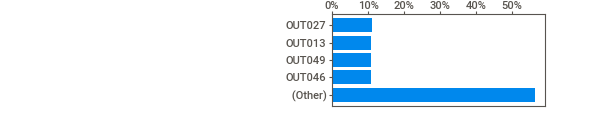
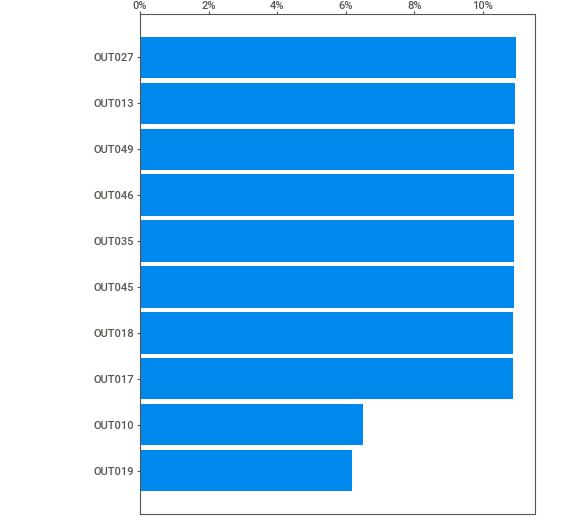
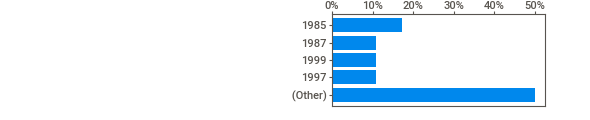
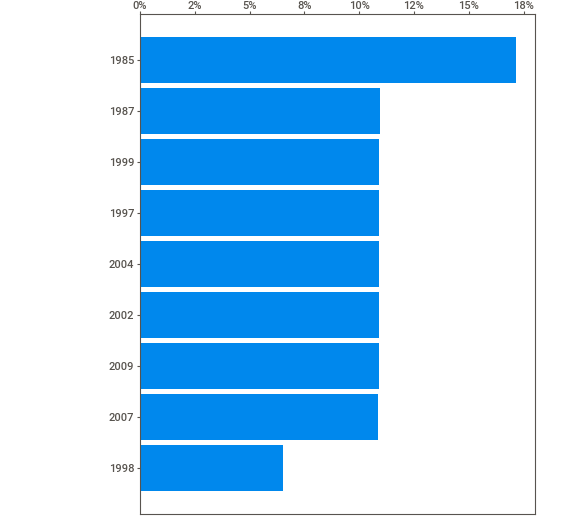
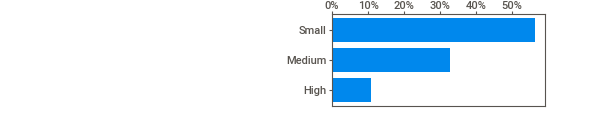
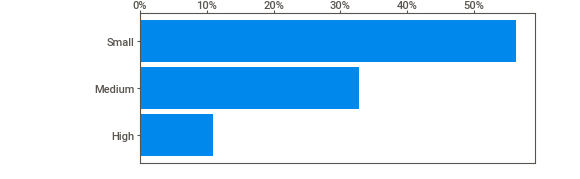
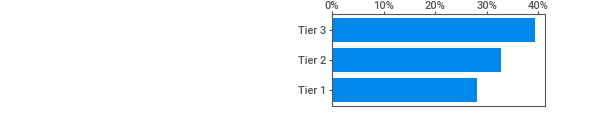
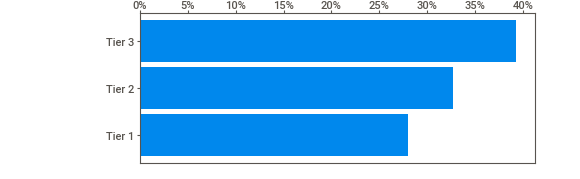
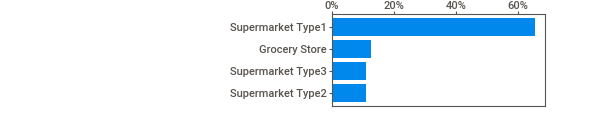
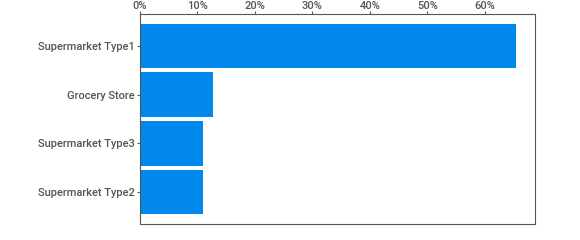
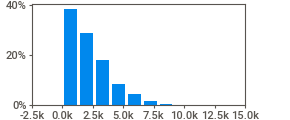
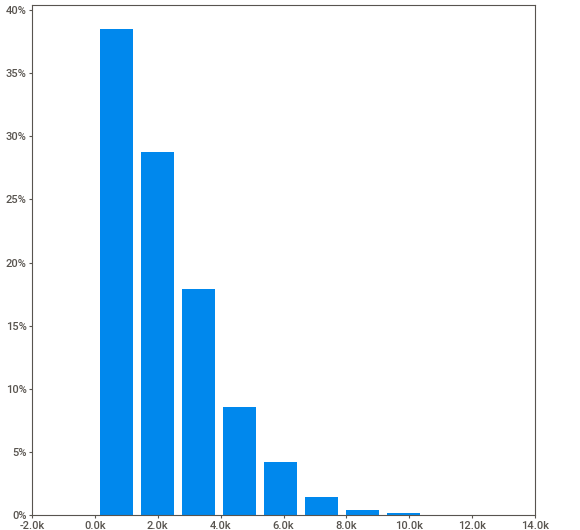
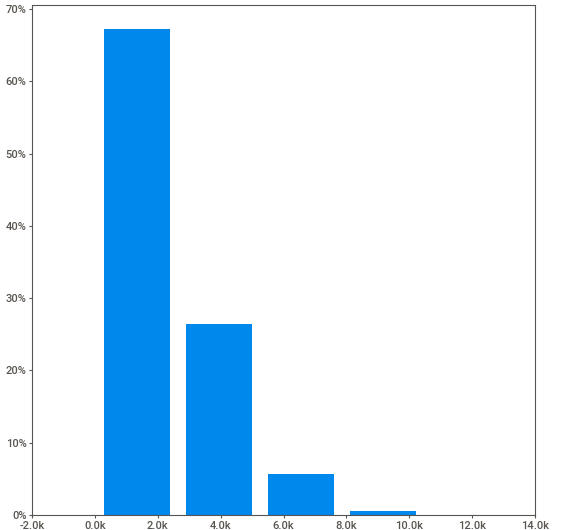
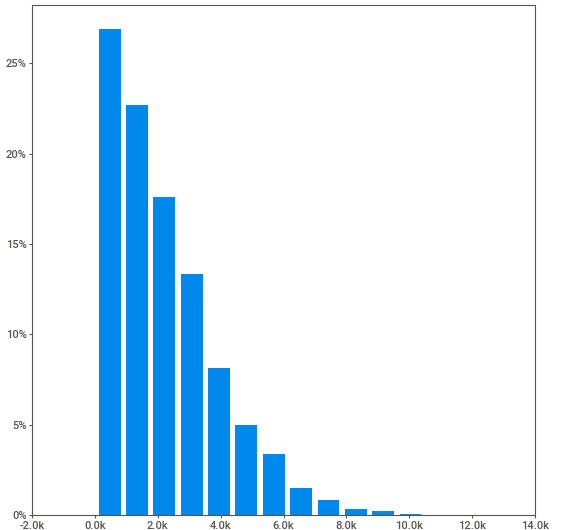
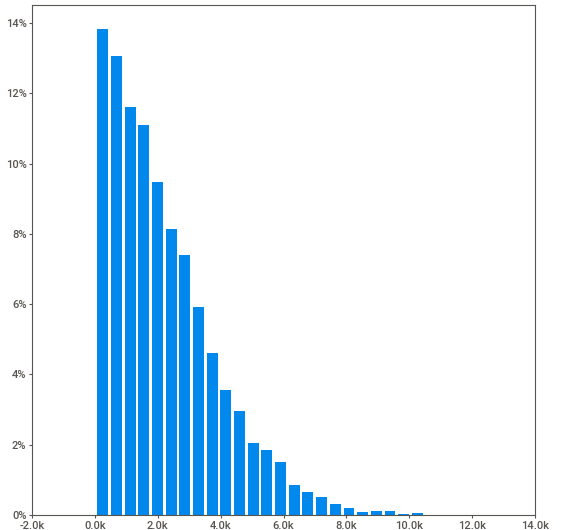
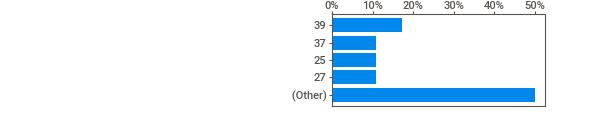
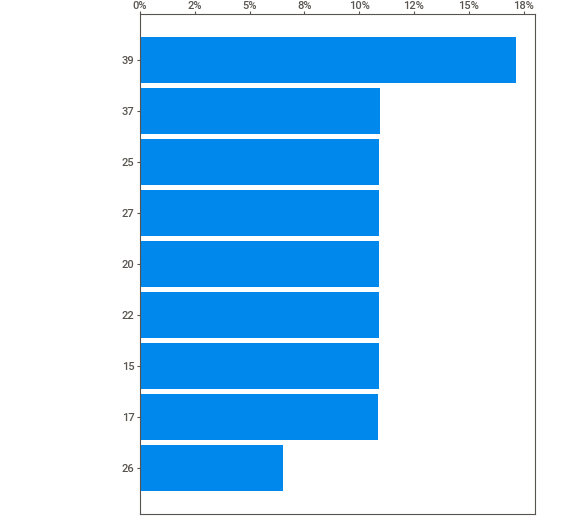
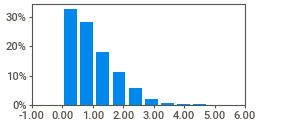
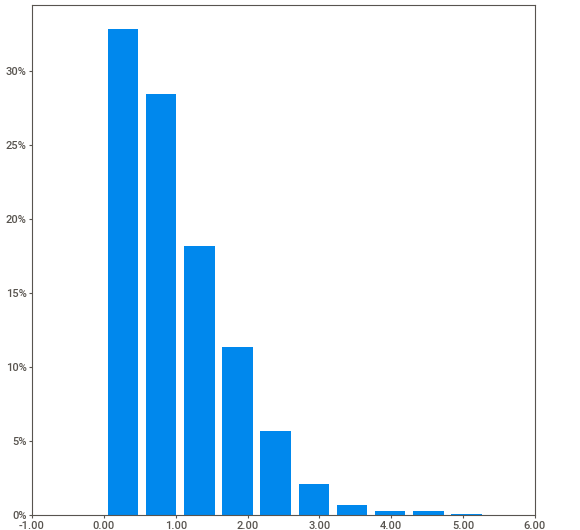
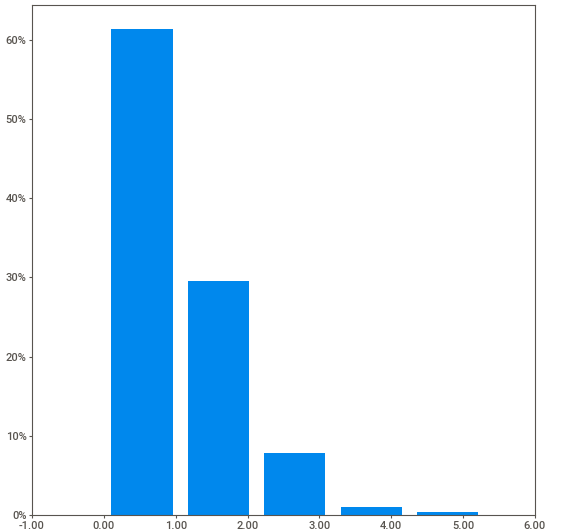
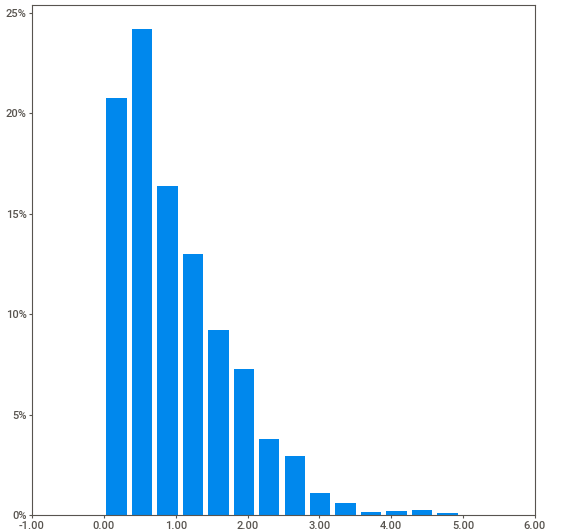
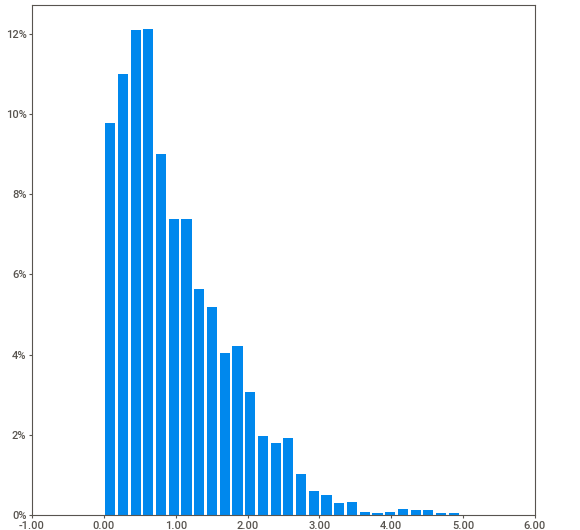
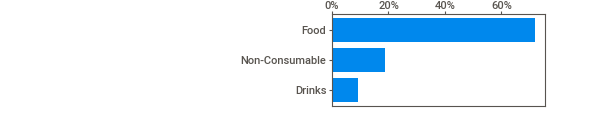
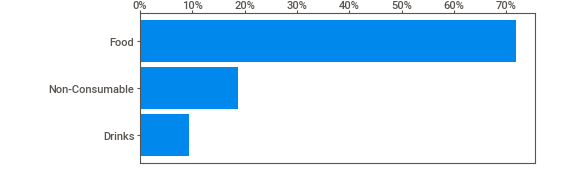
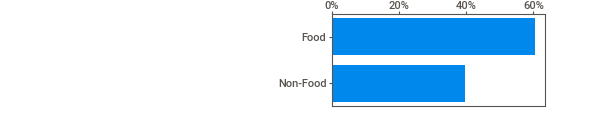
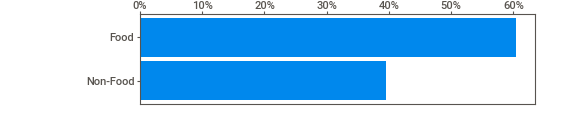
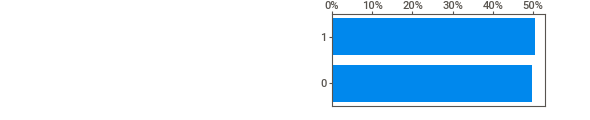
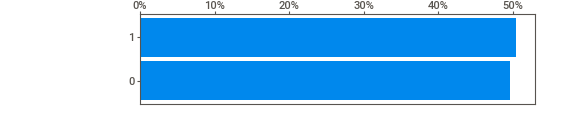
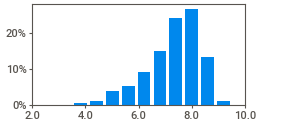
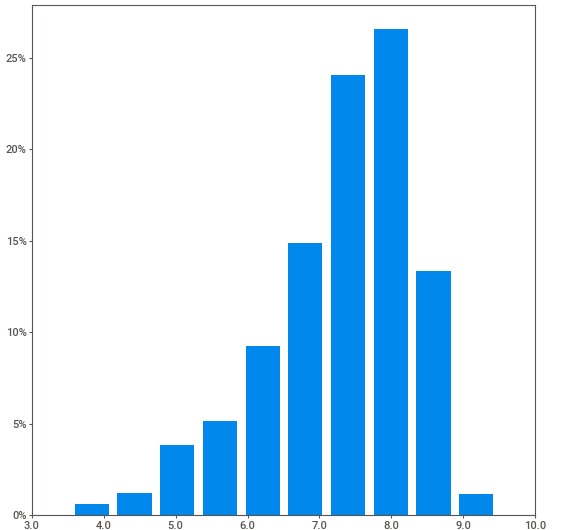
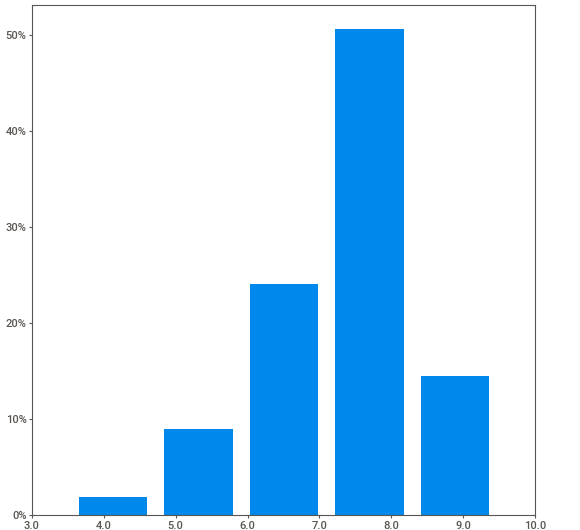
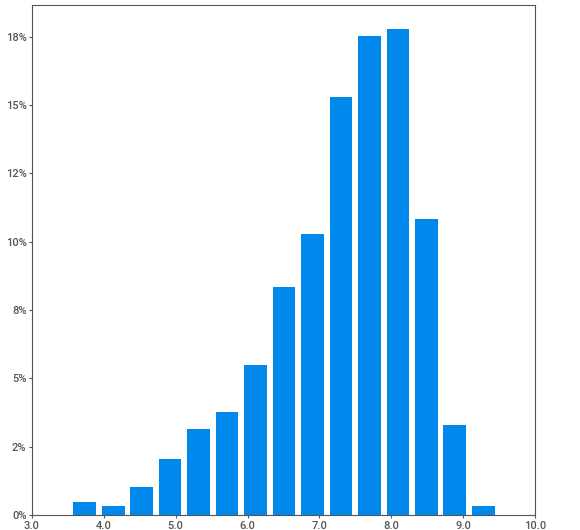
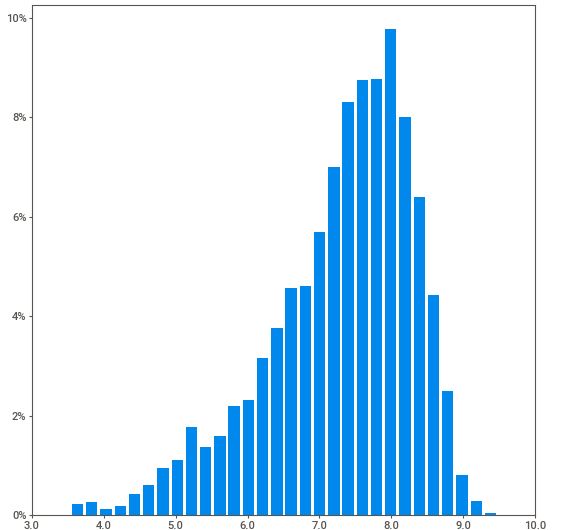
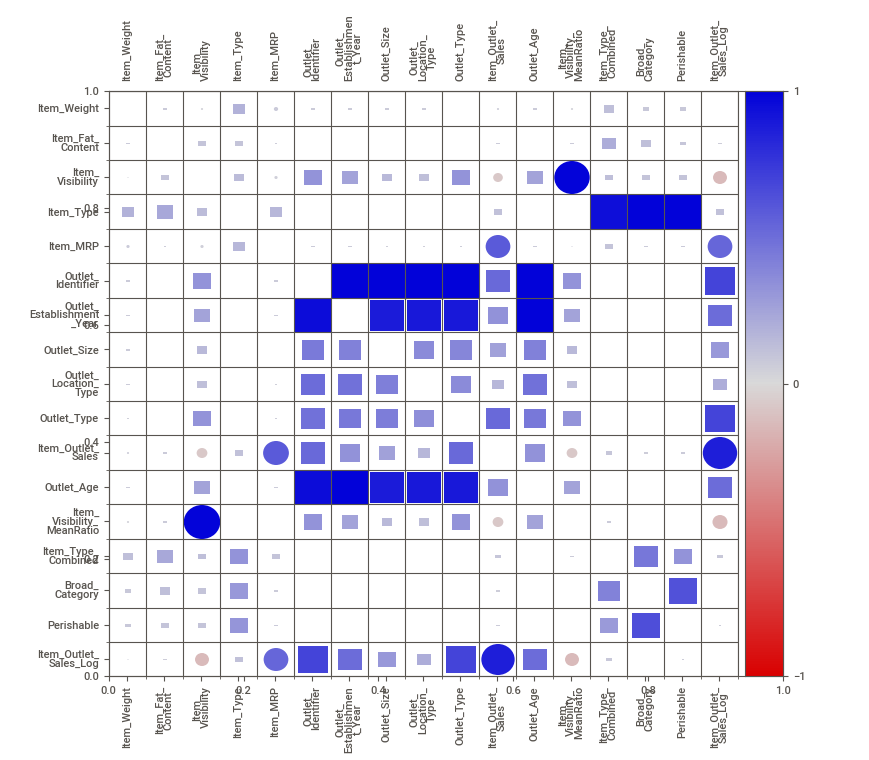
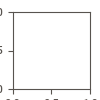

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [32]:
import sweetviz as sv

# Assuming your dataset is in a DataFrame called 'modified_dataset'
my_report = sv.analyze(modified_data)

# Show the report in a Jupyter notebook
my_report.show_notebook()

# Alternatively, you can save the report to an HTML file and open it in a web browser
my_report.show_html('sweetviz_report.html')

In [33]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Read the dataset modified_data
try:
    modified_data = pd.read_csv("modified_dataset.csv")
    
    # Display the dataframe
    display(modified_data)  

except FileNotFoundError:
    print("File not found. Please check the file path and name.")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_MeanRatio,Item_Type_Combined,Broad_Category,Perishable
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25,0.221565,Food,Food,1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15,0.301353,Drinks,Non-Food,0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25,0.269092,Food,Food,1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,26,0.000000,Food,Food,1
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37,0.000000,Non-Consumable,Non-Food,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,37,0.849412,Food,Food,1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,22,0.679238,Food,Food,1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,20,0.637248,Non-Consumable,Non-Food,0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,15,2.172329,Food,Food,1


# ASSOCIATION MINING

In [34]:
pip install mlxtend


  Using cached mlxtend-0.23.1-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.1-py3-none-any.whl (1.4 MB)


In [35]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming 'modified_data' is your original DataFrame
# Select only the categorical columns
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined', 'Broad_Category', 'Perishable']
categorical_data = modified_data[categorical_columns]

# Convert categorical columns to a one-hot encoded format
categorical_data_encoded = pd.get_dummies(categorical_data, drop_first=True)

# Now 'categorical_data_encoded' is ready for association rule mining


# Assume 'categorical_data_encoded' is your one-hot encoded pandas DataFrame

# Apply the apriori algorithm to find frequent itemsets
# Adjust the min_support parameter to find the itemsets frequency threshold that suits your needs
frequent_itemsets = apriori(categorical_data_encoded, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# This will give you the rules with a confidence level above the specified threshold
# You can sort the rules by confidence, lift, or other interesting metrics
rules = rules.sort_values(by='lift', ascending=False)

# Display the top 10 association rules
display(rules.head(10))

C:\Users\Dell\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
418,"(Item_Type_Combined_Food, Broad_Category_Non-F...",(Item_Type_Canned),0.130470,0.076147,0.076147,0.583633,7.664568,0.066212,2.218844,1.000000
421,(Item_Type_Canned),"(Item_Type_Combined_Food, Broad_Category_Non-F...",0.076147,0.130470,0.076147,1.000000,7.664568,0.066212,NaN,0.941199
1606,"(Item_Type_Combined_Food, Outlet_Type_Supermar...","(Outlet_Location_Type_Tier 3, Outlet_Size_Medi...",0.080019,0.110994,0.055028,0.687683,6.195692,0.046146,2.846489,0.911538
1605,"(Outlet_Location_Type_Tier 3, Outlet_Size_Medi...","(Item_Type_Combined_Food, Outlet_Type_Supermar...",0.110994,0.080019,0.055028,0.495772,6.195692,0.046146,1.824533,0.943298
1610,"(Outlet_Type_Supermarket Type3, Perishable)","(Item_Type_Combined_Food, Outlet_Size_Medium, ...",0.056318,0.158747,0.055028,0.977083,6.154975,0.046087,36.709225,0.887513
1601,"(Item_Type_Combined_Food, Outlet_Size_Medium, ...","(Outlet_Type_Supermarket Type3, Perishable)",0.158747,0.056318,0.055028,0.346637,6.154975,0.046087,1.444346,0.995574
1571,"(Item_Type_Combined_Food, Outlet_Size_Medium, ...","(Outlet_Type_Supermarket Type2, Perishable)",0.158747,0.054676,0.052798,0.332594,6.083049,0.044119,1.416416,0.993291
1582,"(Outlet_Type_Supermarket Type2, Perishable)","(Item_Type_Combined_Food, Outlet_Size_Medium, ...",0.054676,0.158747,0.052798,0.965665,6.083049,0.044119,24.501496,0.883939
1574,"(Outlet_Location_Type_Tier 3, Outlet_Size_Medi...","(Item_Type_Combined_Food, Outlet_Type_Supermar...",0.110994,0.078728,0.052798,0.475687,6.042148,0.044060,1.757103,0.938684
1579,"(Item_Type_Combined_Food, Outlet_Type_Supermar...","(Outlet_Location_Type_Tier 3, Outlet_Size_Medi...",0.078728,0.110994,0.052798,0.670641,6.042148,0.044060,2.699200,0.905809


# Data Cleaning and Preprocessing

In [36]:
#CHECK FOR MISSING VALUES:

# Check for missing values
missing_values = modified_data.isnull().sum()

missing_values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
Item_Visibility_MeanRatio    0
Item_Type_Combined           0
Broad_Category               0
Perishable                   0
dtype: int64

- # Apply Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select numerical columns for scaling
num_cols = modified_data.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling to numerical columns
modified_data[num_cols] = scaler.fit_transform(modified_data[num_cols])

- # Apply Data Cardinality - Understanding Unique Categories

- To assess the number of unique values in each categorical column to understand the data's cardinality. High cardinality features (with many unique values) might not be suitable for one-hot encoding as it would lead to a large increase in the dataset's dimensionality. In such cases, other encoding techniques like label encoding or more sophisticated methods such as target encoding, binary encoding, or embedding layers (in deep learning models) might be more appropriate.

In [38]:
import pandas as pd

# Assuming 'modified_data' is a preloaded pandas DataFrame

# Dictionary to hold the column names and their respective number of unique values
unique_counts = {}

# List of categorical columns to be potentially encoded
categorical_columns = [
    'Item_Fat_Content', 
    'Item_Type', 
    'Outlet_Identifier', 
    'Outlet_Size', 
    'Outlet_Location_Type', 
    'Outlet_Type', 
    'Item_Type_Combined', 
    'Broad_Category'
]

# Calculate the number of unique values in each categorical column
for col in categorical_columns:
    unique_counts[col] = modified_data[col].nunique()

# Display the number of unique values for each column
for col, count in unique_counts.items():
    print(f"{col} has {count} unique values")

# Based on the unique value counts, you can decide which type of encoding to use

Item_Fat_Content has 2 unique values
Item_Type has 16 unique values
Outlet_Identifier has 10 unique values
Outlet_Size has 3 unique values
Outlet_Location_Type has 3 unique values
Outlet_Type has 4 unique values
Item_Type_Combined has 3 unique values
Broad_Category has 2 unique values


In [39]:
import pandas as pd

# Assuming you have a DataFrame named modified_data

# Define the list of categorical columns you want to one-hot encode
categorical_cols = ['Item_Fat_Content', 'Broad_Category']

# Verify column names against the DataFrame's columns
for col in categorical_cols:
    if col not in modified_data.columns:
        print(f"Column '{col}' does not exist in the DataFrame.")

# If all columns exist, apply one-hot encoding to categorical columns using pandas get_dummies
if all(col in modified_data.columns for col in categorical_cols):
    modified_data_encoded = pd.get_dummies(modified_data, columns=categorical_cols)
    # Display the modified dataset
    display(modified_data_encoded.head())
    # Save to CSV
    modified_data_encoded.to_csv('modified_data_encoded.csv', index=False)
else:
    display("One or more columns specified for one-hot encoding do not exist in the DataFrame.")

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_MeanRatio,Item_Type_Combined,Perishable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Broad_Category_Food,Broad_Category_Non-Food
0,FDA15,-0.840601,-0.970732,Dairy,1.747454,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,0.910601,-0.139541,-0.998781,Food,0.991704,True,False,True,False
1,DRC01,-1.639173,-0.908111,Soft Drinks,-1.489023,OUT018,1.334103,Medium,Tier 3,Supermarket Type2,-1.018440,-1.334103,-0.896407,Drinks,-1.008365,False,True,False,True
2,FDN15,1.096763,-0.956917,Meat,0.010040,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,-0.049238,-0.139541,-0.937800,Food,0.991704,True,False,True,False
3,FDX07,1.498411,-1.281758,Fruits and Vegetables,0.660050,OUT010,0.020085,Small,Tier 3,Grocery Store,-0.849103,-0.020085,-1.283062,Food,0.991704,False,True,True,False
4,NCD19,-0.928018,-1.281758,Household,-1.399220,OUT013,-1.293934,High,Tier 3,Supermarket Type1,-0.695373,1.293934,-1.283062,Non-Consumable,-1.008365,True,False,False,True


In [40]:
# Verify column names against the DataFrame's columns
for col in categorical_cols:
    if col not in modified_data.columns:
        print(f"Column '{col}' does not exist in the DataFrame.")

# If all columns exist, apply one-hot encoding to categorical columns using pandas get_dummies
if all(col in modified_data.columns for col in categorical_cols):
    modified_data_encoded = pd.get_dummies(modified_data, columns=categorical_cols)
    # Display the modified dataset
    display(modified_data_encoded.head())
    # Save to CSV
    modified_data_encoded.to_csv('modified_data_encoded.csv', index=False)
else:
    print("One or more columns specified for one-hot encoding do not exist in the DataFrame.")

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_MeanRatio,Item_Type_Combined,Perishable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Broad_Category_Food,Broad_Category_Non-Food
0,FDA15,-0.840601,-0.970732,Dairy,1.747454,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,0.910601,-0.139541,-0.998781,Food,0.991704,True,False,True,False
1,DRC01,-1.639173,-0.908111,Soft Drinks,-1.489023,OUT018,1.334103,Medium,Tier 3,Supermarket Type2,-1.018440,-1.334103,-0.896407,Drinks,-1.008365,False,True,False,True
2,FDN15,1.096763,-0.956917,Meat,0.010040,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,-0.049238,-0.139541,-0.937800,Food,0.991704,True,False,True,False
3,FDX07,1.498411,-1.281758,Fruits and Vegetables,0.660050,OUT010,0.020085,Small,Tier 3,Grocery Store,-0.849103,-0.020085,-1.283062,Food,0.991704,False,True,True,False
4,NCD19,-0.928018,-1.281758,Household,-1.399220,OUT013,-1.293934,High,Tier 3,Supermarket Type1,-0.695373,1.293934,-1.283062,Non-Consumable,-1.008365,True,False,False,True


# Apply Label Encoder

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assume modified_data is your loaded data

# Print out the column names of modified_data to verify
print("Column names in modified_data:", modified_data.columns)

# The categorical columns seem to have been one-hot encoded already in the DataFrame
# Therefore, you do not need to perform one-hot encoding again

# Selecting binary categorical columns for label encoding
binary_cols = ['Item_Fat_Content', 'Broad_Category', 'Perishable']

# Apply label encoding to binary categorical columns
le = LabelEncoder()
for col in binary_cols:
    modified_data[col] = le.fit_transform(modified_data[col])

# Display the modified dataset
display(modified_data.head())

# Now, save the already modified_data to a CSV file
modified_data.to_csv('modified_data_encoded.csv', index=False)

Column names in modified_data: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age',
       'Item_Visibility_MeanRatio', 'Item_Type_Combined', 'Broad_Category',
       'Perishable'],
      dtype='object')


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_MeanRatio,Item_Type_Combined,Broad_Category,Perishable
0,FDA15,-0.840601,0,-0.970732,Dairy,1.747454,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,0.910601,-0.139541,-0.998781,Food,0,1
1,DRC01,-1.639173,1,-0.908111,Soft Drinks,-1.489023,OUT018,1.334103,Medium,Tier 3,Supermarket Type2,-1.018440,-1.334103,-0.896407,Drinks,1,0
2,FDN15,1.096763,0,-0.956917,Meat,0.010040,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,-0.049238,-0.139541,-0.937800,Food,0,1
3,FDX07,1.498411,1,-1.281758,Fruits and Vegetables,0.660050,OUT010,0.020085,Small,Tier 3,Grocery Store,-0.849103,-0.020085,-1.283062,Food,0,1
4,NCD19,-0.928018,0,-1.281758,Household,-1.399220,OUT013,-1.293934,High,Tier 3,Supermarket Type1,-0.695373,1.293934,-1.283062,Non-Consumable,1,0


# Create a new DataFrame and Export to CSV:

In [42]:
import pandas as pd

# Load your data into the DataFrame
# modified_data = pd.read_csv('your_data.csv')  # Uncomment this line if you need to load the data from a CSV file.

# Assuming that you have a pandas DataFrame named modified_data

# It looks like 'Item_Fat_Content' and 'Broad_Category' are already encoded as integers.
# If these are indeed categorical with no ordinal meaning, we can convert them to strings before one-hot encoding.
# This step ensures that get_dummies treats these as categorical variables.

modified_data['Item_Fat_Content'] = modified_data['Item_Fat_Content'].astype(str)
modified_data['Broad_Category'] = modified_data['Broad_Category'].astype(str)

# Identify the nominal categorical columns you want to one-hot encode
one_hot_columns = ['Item_Fat_Content', 'Broad_Category']  # These are the columns to be one-hot encoded

# Apply One-Hot Encoding to these columns
modified_data_encoded = pd.get_dummies(modified_data, columns=one_hot_columns)

# Save the DataFrame with the one-hot encoded columns to a new CSV file
modified_data_encoded.to_csv('modified_data_encoded.csv', index=False)

# Print a message to confirm that the file has been saved
print("DataFrame with one-hot encoded columns saved to 'modified_data_encoded.csv'")

DataFrame with one-hot encoded columns saved to 'modified_data_encoded.csv'


In [43]:
#Drop the Item Identifier

# Assuming 'modified_data_encoded' is your DataFrame and it contains a column named 'Item_Identifier'
modified_data_encoded = modified_data_encoded.drop('Item_Identifier', axis=1)

# Now save the modified DataFrame without the 'Item_Identifier' column to a CSV file
modified_data_encoded.to_csv('modified_data_encoded.csv', index=False)

Dropping 'Item_Identifier' column before performing feature selection and data partitioning. The 'Item_Identifier' column is likely to be irrelevant for predicting sales and may not contribute significantly to the model's performance.

# FEATURE SELECTION

In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your data into a DataFrame
modified_data_encoded = pd.read_csv('modified_data_encoded.csv')  # Make sure this path is correct

# Drop the Item Identifier column if present
if 'Item_Identifier' in modified_data_encoded.columns:
    modified_data_encoded = modified_data_encoded.drop('Item_Identifier', axis=1)

# Identify the target variable
target_column = 'Item_Outlet_Sales'  # Make sure this column exists in your DataFrame
y = modified_data_encoded[target_column]

# Drop the target column from the features dataset
X = modified_data_encoded.drop(target_column, axis=1)

# Check for any non-numeric data in X
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# If non-numeric columns are found, apply one-hot encoding
if len(non_numeric_columns) > 0:
    X = pd.get_dummies(X)

# Initialize the Random Forest Regressor with a random state for reproducibility
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training dataset
rf.fit(X_train, y_train)

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to view the feature importances
importances_modified_data_encoded = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Save the feature importances to a CSV file
importances_modified_data_encoded.to_csv('feature_importances.csv', index=False)

# Display the feature importances
print(importances_modified_data_encoded)

                              Feature  Importance
2                            Item_MRP    0.432639
43          Outlet_Type_Grocery Store    0.193082
5           Item_Visibility_MeanRatio    0.057519
1                     Item_Visibility    0.055987
0                         Item_Weight    0.055258
4                          Outlet_Age    0.039175
3           Outlet_Establishment_Year    0.028537
32           Outlet_Identifier_OUT027    0.014444
46      Outlet_Type_Supermarket Type3    0.009618
24              Item_Type_Snack Foods    0.006440
17    Item_Type_Fruits and Vegetables    0.006366
33           Outlet_Identifier_OUT035    0.005258
34           Outlet_Identifier_OUT045    0.004636
15                    Item_Type_Dairy    0.004589
16             Item_Type_Frozen Foods    0.004556
7                  Item_Fat_Content_0    0.004436
8                  Item_Fat_Content_1    0.004269
6                          Perishable    0.004143
35           Outlet_Identifier_OUT046    0.003774


In [45]:
import pandas as pd

# Load your data into a DataFrame
modified_data_encoded = pd.read_csv('modified_data_encoded.csv')  # Make sure this path is correct

# Ensure all data is numeric by excluding non-numeric columns
numeric_data = modified_data_encoded.select_dtypes(include=[np.number])  # only use numeric data for corr

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()
target_correlation = correlation_matrix['Item_Outlet_Sales'].abs().sort_values(ascending=False)
top_features = target_correlation[1:11]  # Exclude the target variable itself

# Calculate the maximum absolute correlation coefficient
max_corr = target_correlation.iloc[0]

# Normalize the correlation coefficients and convert to percentage
top_features_percent = (top_features / max_corr) * 100

# Display the top features as a percentage
print("Top 7 most important predictors (as % with target variable):")
print(top_features_percent)

Top 7 most important predictors (as % with target variable):
Item_MRP                     56.757445
Item_Visibility_MeanRatio    12.951540
Item_Visibility              12.862461
Outlet_Age                    4.913497
Outlet_Establishment_Year     4.913497
Perishable                    1.620440
Item_Weight                   1.208830
Name: Item_Outlet_Sales, dtype: float64


In [46]:
# Save the feature importances to a CSV file
importances_modified_data_encoded.to_csv('feature_importances.csv', index=False)

In [47]:
importances_modified_data_encoded

,Feature,Importance
2,Item_MRP,0.432639
43,Outlet_Type_Grocery Store,0.193082
5,Item_Visibility_MeanRatio,0.057519
1,Item_Visibility,0.055987
0,Item_Weight,0.055258
4,Outlet_Age,0.039175
3,Outlet_Establishment_Year,0.028537
32,Outlet_Identifier_OUT027,0.014444
46,Outlet_Type_Supermarket Type3,0.009618
24,Item_Type_Snack Foods,0.006440


In [48]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install tensorflow

In [50]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


# MODEL SELECTION AND TRAINING

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# DATA SPLITTING INTO TEST AND TRAIN

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your data into a DataFrame
modified_data_encoded = pd.read_csv('modified_data_encoded.csv')  # Make sure this path is correct

# Drop the Item Identifier column if present
if 'Item_Identifier' in modified_data_encoded.columns:
    modified_data_encoded = modified_data_encoded.drop('Item_Identifier', axis=1)

# Check for any non-numeric data in the DataFrame and apply one-hot encoding
non_numeric_columns = modified_data_encoded.select_dtypes(exclude=['number']).columns
if len(non_numeric_columns) > 0:
    modified_data_encoded = pd.get_dummies(modified_data_encoded)

# Define the feature set with the correct column names after one-hot encoding
feature_columns = [
    'Item_MRP',
    # Assuming 'Outlet_Type' was one-hot encoded and 'Outlet_Type_Grocery Store' is the correct column name
    'Outlet_Type_Grocery Store',  
    'Item_Visibility_MeanRatio',
    'Item_Visibility',
    'Item_Weight',
    'Outlet_Age',
    'Outlet_Establishment_Year'
]

# Make sure the column names match the one-hot encoded DataFrame
# If the column names don't match, update them accordingly
X = modified_data_encoded[feature_columns]
y = modified_data_encoded['Item_Outlet_Sales']

# Initialize the Random Forest Regressor with a random state for reproducibility
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training dataset
rf.fit(X_train, y_train)

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to view the feature importances
importances_modified_data_encoded = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importances_modified_data_encoded)

# Save the feature importances to a CSV file
importances_modified_data_encoded.to_csv('feature_importances.csv', index=False)

                     Feature  Importance
0                   Item_MRP    0.459379
1  Outlet_Type_Grocery Store    0.193082
4                Item_Weight    0.077517
2  Item_Visibility_MeanRatio    0.076695
3            Item_Visibility    0.074943
5                 Outlet_Age    0.061689
6  Outlet_Establishment_Year    0.056695


# Data Preprocessing and Model Training Setup

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data into a DataFrame
modified_data_encoded = pd.read_csv('modified_data_encoded.csv')  # Make sure this path is correct

# Drop the 'Item_Identifier' column if present, as in the first script
if 'Item_Identifier' in modified_data_encoded.columns:
    modified_data_encoded = modified_data_encoded.drop('Item_Identifier', axis=1)

# Check for any non-numeric data in the DataFrame and apply one-hot encoding, as in the first script
non_numeric_columns = modified_data_encoded.select_dtypes(exclude=['number']).columns
if len(non_numeric_columns) > 0:
    modified_data_encoded = pd.get_dummies(modified_data_encoded)

# Define the feature set based on the given feature importance
feature_columns = [
    'Item_MRP',
    'Outlet_Type_Grocery Store',
    'Item_Weight',
    'Item_Visibility_MeanRatio',  # Assuming this column exists after encoding
    'Item_Visibility',
    'Outlet_Age',                 # Assuming this column exists or is created from 'Outlet_Establishment_Year'
    'Outlet_Establishment_Year'
]

# If 'Outlet_Age' does not exist, calculate it from 'Outlet_Establishment_Year'
if 'Outlet_Age' not in modified_data_encoded.columns:
    current_year = 2024  # Assuming the current year is 2024
    modified_data_encoded['Outlet_Age'] = current_year - modified_data_encoded['Outlet_Establishment_Year']

# Make sure the column names match the one-hot encoded DataFrame
X = modified_data_encoded[feature_columns]
y = modified_data_encoded['Item_Outlet_Sales']

# Split the dataset into training + test sets (for further splitting) and holdout test set
X_train_test, X_holdout_test, y_train_test, y_holdout_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training+test set into actual training set and validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42)

# Print the sizes of each dataset to confirm the splits
print(f"Training set size: {X_train.shape[0]} samples - Features: {X_train.columns.to_list()}")
print(f"Validation set size: {X_validation.shape[0]} samples - Features: {X_validation.columns.to_list()}")
print(f"Testing set size: {X_holdout_test.shape[0]} samples - Features: {X_holdout_test.columns.to_list()}")

# Create a DataFrame to store the summary
summary_df = pd.DataFrame({
    "Dataset": ["Training", "Validation", "Testing"],
    "Size": [X_train.shape[0], X_validation.shape[0], X_holdout_test.shape[0]],
    "Features": [", ".join(X_train.columns)] * 3  # Repeat the feature list for all three rows
})

# Display the DataFrame
display(summary_df)

Training set size: 5113 samples - Features: ['Item_MRP', 'Outlet_Type_Grocery Store', 'Item_Weight', 'Item_Visibility_MeanRatio', 'Item_Visibility', 'Outlet_Age', 'Outlet_Establishment_Year']
Validation set size: 1705 samples - Features: ['Item_MRP', 'Outlet_Type_Grocery Store', 'Item_Weight', 'Item_Visibility_MeanRatio', 'Item_Visibility', 'Outlet_Age', 'Outlet_Establishment_Year']
Testing set size: 1705 samples - Features: ['Item_MRP', 'Outlet_Type_Grocery Store', 'Item_Weight', 'Item_Visibility_MeanRatio', 'Item_Visibility', 'Outlet_Age', 'Outlet_Establishment_Year']


,Dataset,Size,Features
0,Training,5113,"Item_MRP, Outlet_Type_Grocery Store, Item_Weig..."
1,Validation,1705,"Item_MRP, Outlet_Type_Grocery Store, Item_Weig..."
2,Testing,1705,"Item_MRP, Outlet_Type_Grocery Store, Item_Weig..."


# Data Split Visualization

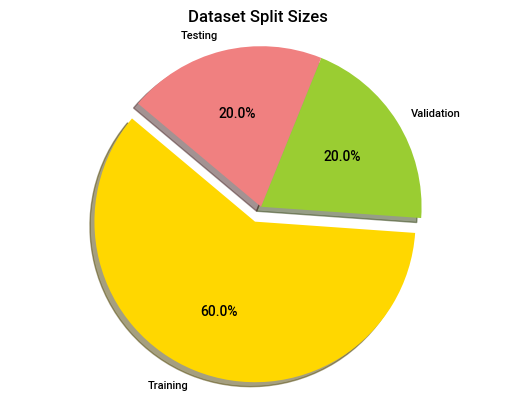

In [54]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Training', 'Validation', 'Testing'
sizes = [5113, 1705, 1705]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice for emphasis

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Dataset Split Sizes')
plt.show()

# Feature Visualization of Training Set

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


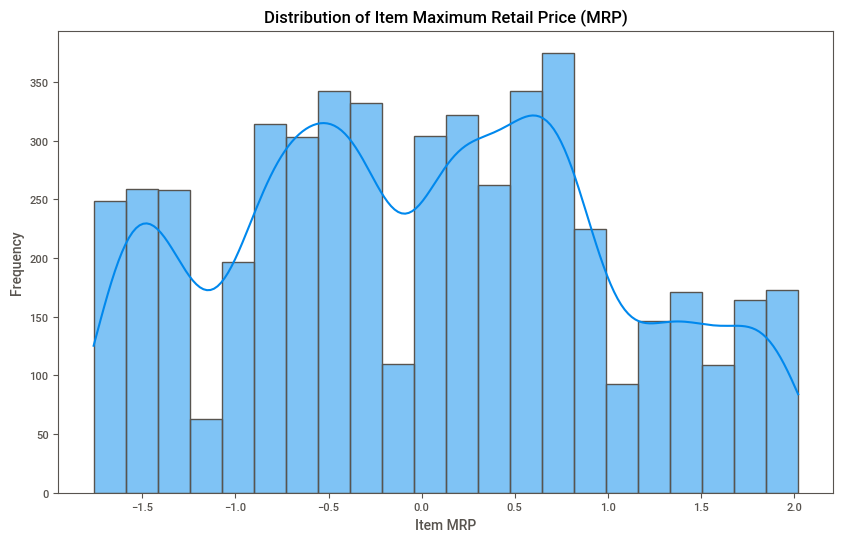

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


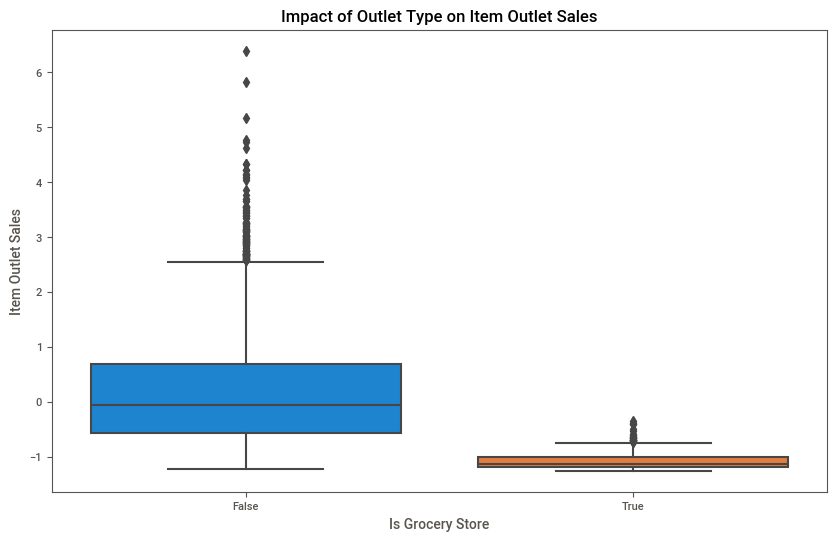

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


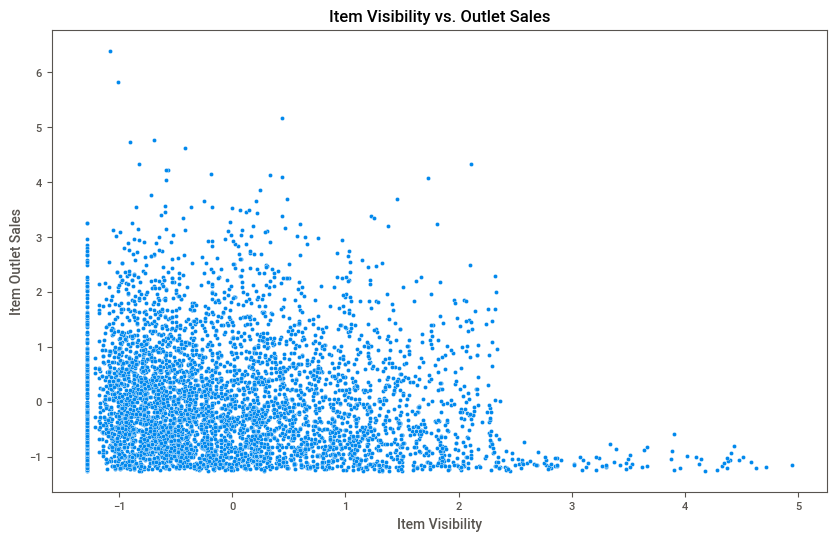

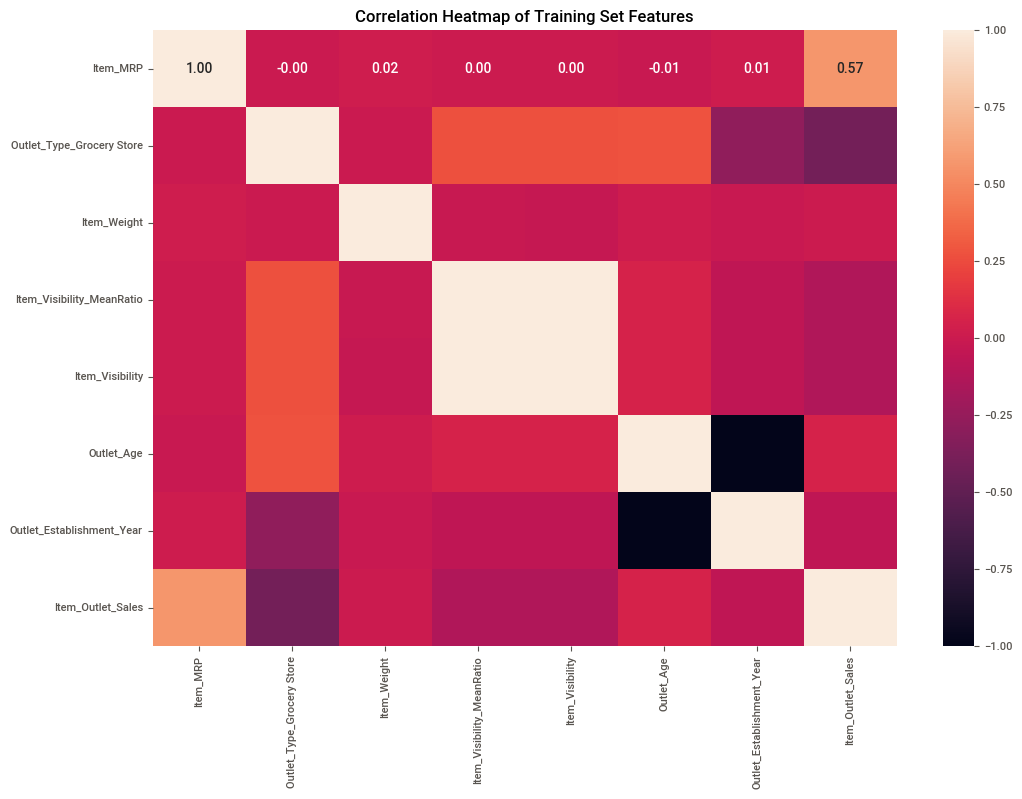

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already created X_train and y_train as per the code you shared

# Visualize the distribution of the 'Item_MRP' feature
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Item_MRP'], kde=True)
plt.title('Distribution of Item Maximum Retail Price (MRP)')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'Outlet_Type_Grocery Store' to see its impact on 'Item_Outlet_Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Outlet_Type_Grocery Store'], y=y_train)
plt.title('Impact of Outlet Type on Item Outlet Sales')
plt.xlabel('Is Grocery Store')
plt.ylabel('Item Outlet Sales')
plt.show()

# Scatter plot to visualize the relationship between 'Item_Visibility' and 'Item_Outlet_Sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['Item_Visibility'], y=y_train)
plt.title('Item Visibility vs. Outlet Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

# Heatmap of the correlations of the features
plt.figure(figsize=(12, 8))
correlation_matrix = X_train.join(y_train).corr()  # Join X_train and y_train for correlation
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Training Set Features')
plt.show()

# DATA PREPARATION FOR MACHINE LEARNING

In [56]:
# List of categorical columns to be one-hot encoded
categorical_columns = ['Item_Fat_Content', 'Perishable']

# Convert the 'Outlet_Type_Grocery_Store' column from boolean to int (0 or 1)
X_train['Outlet_Type_Grocery Store'] = X_train['Outlet_Type_Grocery Store'].astype(int)
X_validation['Outlet_Type_Grocery Store'] = X_validation['Outlet_Type_Grocery Store'].astype(int)
X_holdout_test['Outlet_Type_Grocery Store'] = X_holdout_test['Outlet_Type_Grocery Store'].astype(int)

# Check if the categorical columns exist in the DataFrame before one-hot encoding
actual_categorical_columns_train = [col for col in categorical_columns if col in X_train.columns]
actual_categorical_columns_validation = [col for col in categorical_columns if col in X_validation.columns]
actual_categorical_columns_holdout_test = [col for col in categorical_columns if col in X_holdout_test.columns]

# One-hot encode the categorical columns that exist in the DataFrames
X_train = pd.get_dummies(X_train, columns=actual_categorical_columns_train, drop_first=True)
X_validation = pd.get_dummies(X_validation, columns=actual_categorical_columns_validation, drop_first=True)
X_holdout_test = pd.get_dummies(X_holdout_test, columns=actual_categorical_columns_holdout_test, drop_first=True)

# Align the dataframes by the columns, this ensures that they all have the same one-hot encoded columns
X_train, X_validation = X_train.align(X_validation, join='inner', axis=1)
X_train, X_holdout_test = X_train.align(X_holdout_test, join='inner', axis=1)
X_validation, X_holdout_test = X_validation.align(X_holdout_test, join='inner', axis=1)

# Convert to float32
X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')
X_holdout_test = X_holdout_test.astype('float32')

## DATA QUALITY ASURRANCE CHECK

In [57]:
# Check for consistent column names across DataFrames
assert X_train.columns.equals(X_validation.columns), "X_train and X_validation do not have the same columns after alignment"
assert X_train.columns.equals(X_holdout_test.columns), "X_train and X_holdout_test do not have the same columns after alignment"

# Check for the desired data types
assert all(dtype == 'float32' for dtype in X_train.dtypes), "X_train contains non-float32 dtypes"
assert all(dtype == 'float32' for dtype in X_validation.dtypes), "X_validation contains non-float32 dtypes"
assert all(dtype == 'float32' for dtype in X_holdout_test.dtypes), "X_holdout_test contains non-float32 dtypes"

# Check for NaN and infinite values
assert not X_train.isnull().values.any(), "NaN values found in X_train"
assert not X_validation.isnull().values.any(), "NaN values found in X_validation"
assert not X_holdout_test.isnull().values.any(), "NaN values found in X_holdout_test"

assert not np.isinf(X_train.values).any(), "Infinite values found in X_train"
assert not np.isinf(X_validation.values).any(), "Infinite values found in X_validation"
assert not np.isinf(X_holdout_test.values).any(), "Infinite values found in X_holdout_test"

# Check for consistent shapes
assert X_train.shape[1] == X_validation.shape[1], "X_train and X_validation have a different number of columns after alignment"
assert X_train.shape[1] == X_holdout_test.shape[1], "X_train and X_holdout_test have a different number of columns after alignment"

# MODEL TRAINING

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Assuming X_train, X_validation, y_train, y_validation are already defined and preprocessed

# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_validation)
print(f"Random Forest MSE: {mean_squared_error(y_validation, rf_predictions)}")

# XGBoost Model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_validation)
print(f"XGBoost MSE: {mean_squared_error(y_validation, xgb_predictions)}")

# LightGBM ModelMODEL TRAINING
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_validation)
print(f"LightGBM MSE: {mean_squared_error(y_validation, lgbm_predictions)}")

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_validation)
print(f"Gradient Boosting MSE: {mean_squared_error(y_validation, gb_predictions)}")

Random Forest MSE: 0.4675602783052976
XGBoost MSE: 0.5021768465060216
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.652872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1002
[LightGBM] [Info] Number of data points in the train set: 5113, number of used features: 7
[LightGBM] [Info] Start training from score 0.012513
LightGBM MSE: 0.4433483621543488
Gradient Boosting MSE: 0.4142810300165644


# HYPERPARAMETERS Tuning

In [59]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [60]:
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

# RANDOM FOREST Boosting hyperparameter distribution

In [61]:
# Import all necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_validation, and y_validation are already defined

# Define the hyperparameter distribution to sample from
rf_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate the base RandomForestRegressor model
base_rf_model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV with the model and hyperparameter distribution
rf_random_search = RandomizedSearchCV(
    estimator=base_rf_model,
    param_distributions=rf_param_dist,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    verbose=2,   # Show messages while fitting
    random_state=42,  # Seed for reproducibility
    n_jobs=-1    # Use all available cores
)

# Perform the hyperparameter search
rf_random_search.fit(X_train, y_train)

# Retrieve the best model from the search
best_rf_model = rf_random_search.best_estimator_

# Make predictions using the best model
rf_best_predictions = best_rf_model.predict(X_validation)

# Calculate and print the Mean Squared Error of the best model
mse = mean_squared_error(y_validation, rf_best_predictions)
print(f"Best Random Forest MSE: {mse}")

# After this point, you can further inspect the best_rf_model or use it for
# additional predictions, feature importance analysis, etc.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Random Forest MSE: 0.4171405381336932


# XGBoost Regressor hyperparameter distribution

In [62]:
# Import all necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_validation, and y_validation are already defined

# Define the hyperparameter distribution to sample from for the XGBRegressor
xgb_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 20),
    'learning_rate': uniform(0.01, 0.3),  # Continuous distribution for learning rate
    'subsample': uniform(0.6, 0.4),       # Continuous distribution for subsample
    'colsample_bytree': uniform(0.6, 0.4),  # Continuous distribution for colsample_bytree
    'min_child_weight': randint(1, 11)    # Number of samples in a child (leaf)
}

# Instantiate the base XGBRegressor model
base_xgb_model = XGBRegressor(random_state=42)

# Set up RandomizedSearchCV with the model and hyperparameter distribution
xgb_random_search = RandomizedSearchCV(
    estimator=base_xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    verbose=2,   # Show messages while fitting
    random_state=42,  # Seed for reproducibility
    n_jobs=-1    # Use all available cores
)

# Perform the hyperparameter search
xgb_random_search.fit(X_train, y_train)

# Retrieve the best model from the search
best_xgb_model = xgb_random_search.best_estimator_

# Make predictions using the best model
xgb_best_predictions = best_xgb_model.predict(X_validation)

# Calculate and print the Mean Squared Error of the best model
mse = mean_squared_error(y_validation, xgb_best_predictions)
print(f"Best XGBoost MSE: {mse}")

# Now you can use best_xgb_model for further predictions, analysis, or save it for future use.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGBoost MSE: 0.4179806571958767


# LightGBM Regressor hyperparameter distribution

In [63]:
# Import all necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_validation, and y_validation are already defined

# Define the hyperparameter distribution to sample from for the LGBMRegressor
lgbm_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(-1, 50),         # -1 means no limit
    'learning_rate': uniform(0.01, 0.3),  # Continuous distribution for learning rate
    'num_leaves': randint(20, 200),       # Number of leaves in one tree
    'min_child_samples': randint(5, 50),  # Minimal number of data in one leaf
    'subsample': uniform(0.6, 0.4)        # Subsample ratio of the training instance
}

# Instantiate the base LGBMRegressor model
base_lgbm_model = LGBMRegressor(random_state=42)

# Set up RandomizedSearchCV with the model and hyperparameter distribution
lgbm_random_search = RandomizedSearchCV(
    estimator=base_lgbm_model,
    param_distributions=lgbm_param_dist,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    verbose=2,   # Show messages while fitting
    random_state=42,  # Seed for reproducibility
    n_jobs=-1    # Use all available cores
)

# Perform the hyperparameter search
lgbm_random_search.fit(X_train, y_train)

# Retrieve the best model from the search
best_lgbm_model = lgbm_random_search.best_estimator_

# Make predictions using the best model
lgbm_best_predictions = best_lgbm_model.predict(X_validation)

# Calculate and print the Mean Squared Error of the best model
mse = mean_squared_error(y_validation, lgbm_best_predictions)
print(f"Best LightGBM MSE: {mse}")

# The best_lgbm_model is now ready for further predictions, analysis, or to be saved for future use.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1002
[LightGBM] [Info] Number of data points in the train set: 5113, number of used features: 7
[LightGBM] [Info] Start training from score 0.012513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

# Gradient Boosting Regressor

In [64]:
# Import all necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_validation, and y_validation are already defined

# Define the hyperparameter distribution to sample from for the GradientBoostingRegressor
gb_param_dist = {
    'n_estimators': randint(100, 1000),       # Number of boosting stages to perform
    'max_depth': randint(3, 20),              # Maximum depth of the individual regression estimators
    'learning_rate': uniform(0.01, 0.3),      # Learning rate shrinks the contribution of each tree
    'subsample': uniform(0.6, 0.4),           # The fraction of samples to be used for fitting the individual base learners
    'min_samples_split': randint(2, 11),      # The minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 11)        # The minimum number of samples required to be at a leaf node
}

# Instantiate the base GradientBoostingRegressor model
base_gb_model = GradientBoostingRegressor(random_state=42)

# Configure RandomizedSearchCV with the model and the hyperparameter distribution
gb_random_search = RandomizedSearchCV(
    estimator=base_gb_model,
    param_distributions=gb_param_dist,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,        # 5-fold cross-validation
    verbose=2,   # Controls the verbosity: the higher, the more messages
    random_state=42,  # Seed for random number generator for reproducibility
    n_jobs=-1    # Number of jobs to run in parallel (-1 means using all processors)
)

# Perform the hyperparameter search
gb_random_search.fit(X_train, y_train)

# Retrieve the best model from the search
best_gb_model = gb_random_search.best_estimator_

# Make predictions using the best model
gb_best_predictions = best_gb_model.predict(X_validation)

# Calculate and print the Mean Squared Error of the best model
mse = mean_squared_error(y_validation, gb_best_predictions)
print(f"Best Gradient Boosting MSE: {mse}")

# The best_gb_model is now ready for further predictions, analysis, or to be saved for future use.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Gradient Boosting MSE: 0.4522491761726062


# RETREIVING ALL MODEL

In [65]:
# Given MSE values for each model
mse_values = {
    'Random Forest': mean_squared_error(y_validation, rf_best_predictions),
    'XGBoost': mean_squared_error(y_validation, xgb_best_predictions),
    'LightGBM': mean_squared_error(y_validation, lgbm_best_predictions),
    'Gradient Boosting': mean_squared_error(y_validation, gb_best_predictions)
}

# Print the MSE values
for model_name, mse in mse_values.items():
    print(f"{model_name} MSE: {mse}")

# Find the model with the lowest MSE
best_model_name = min(mse_values, key=mse_values.get)
best_model_mse = mse_values[best_model_name]

# Assign the best model to a variable
best_models = {
    'Random Forest': best_rf_model,
    'XGBoost': best_xgb_model,
    'LightGBM': best_lgbm_model,
    'Gradient Boosting': best_gb_model
}

best_overall_model = best_models[best_model_name]

# Print the best model information
print(f"The best model is {best_model_name} with an MSE of {best_model_mse}")

Random Forest MSE: 0.4171405381336932
XGBoost MSE: 0.4179806571958767
LightGBM MSE: 0.4240553163869012
Gradient Boosting MSE: 0.4522491761726062
The best model is Random Forest with an MSE of 0.4171405381336932


# BEST MODEL EVALUATION USING THE HOLDOUT SET

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate the best models using the holdout test set
print("Evaluating Models on Holdout Test Set...")
rf_predictions = best_rf_model.predict(X_holdout_test)
xgb_predictions = best_xgb_model.predict(X_holdout_test)
lgbm_predictions = best_lgbm_model.predict(X_holdout_test)
gb_predictions = best_gb_model.predict(X_holdout_test)

# Calculate additional metrics for each model using the holdout test set
def calculate_performance_metrics(y_true, predictions):
    mse = mean_squared_error(y_true, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)
    return mse, rmse, mae, r2

# Random Forest metrics
rf_mse, rf_rmse, rf_mae, rf_r2 = calculate_performance_metrics(y_holdout_test, rf_predictions)
print("Random Forest Metrics on Holdout Test Set:")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"R-squared: {rf_r2}\n")

# XGBoost metrics
xgb_mse, xgb_rmse, xgb_mae, xgb_r2 = calculate_performance_metrics(y_holdout_test, xgb_predictions)
print("XGBoost Metrics on Holdout Test Set:")
print(f"MSE: {xgb_mse}")
print(f"RMSE: {xgb_rmse}")
print(f"MAE: {xgb_mae}")
print(f"R-squared: {xgb_r2}\n")

# LightGBM metrics
lgbm_mse, lgbm_rmse, lgbm_mae, lgbm_r2 = calculate_performance_metrics(y_holdout_test, lgbm_predictions)
print("LightGBM Metrics on Holdout Test Set:")
print(f"MSE: {lgbm_mse}")
print(f"RMSE: {lgbm_rmse}")
print(f"MAE: {lgbm_mae}")
print(f"R-squared: {lgbm_r2}\n")

# Gradient Boosting metrics
gb_mse, gb_rmse, gb_mae, gb_r2 = calculate_performance_metrics(y_holdout_test, gb_predictions)
print("Gradient Boosting Metrics on Holdout Test Set:")
print(f"MSE: {gb_mse}")
print(f"RMSE: {gb_rmse}")
print(f"MAE: {gb_mae}")
print(f"R-squared: {gb_r2}")

Evaluating Models on Holdout Test Set...
Random Forest Metrics on Holdout Test Set:
MSE: 0.3608463320867626
RMSE: 0.6007048627127656
MAE: 0.4245504943572849
R-squared: 0.6134202892774416

XGBoost Metrics on Holdout Test Set:
MSE: 0.359608733992695
RMSE: 0.5996738563525135
MAE: 0.42312165000059604
R-squared: 0.6147461453847456

LightGBM Metrics on Holdout Test Set:
MSE: 0.3676551189901654
RMSE: 0.6063457091380835
MAE: 0.43313125864587687
R-squared: 0.6061259408597441

Gradient Boosting Metrics on Holdout Test Set:
MSE: 0.39123212077625114
RMSE: 0.6254855080465503
MAE: 0.4361243282562692
R-squared: 0.5808675698588197


# PRINT THE BEST MODEL

In [67]:
# Assuming the presence of best_rf_model, best_xgb_model, best_lgbm_model, best_gb_model, X_holdout_test, and y_holdout_test

# Rest of the code...

# Store the performance metrics for each model in a dictionary for comparison
model_performance = {
    'Random Forest': (rf_mse, rf_rmse, rf_mae, rf_r2),
    'XGBoost': (xgb_mse, xgb_rmse, xgb_mae, xgb_r2),
    'LightGBM': (lgbm_mse, lgbm_rmse, lgbm_mae, lgbm_r2),
    'Gradient Boosting': (gb_mse, gb_rmse, gb_mae, gb_r2)
}

# Select the best model based on the highest R-squared and the lowest RMSE
best_model_name = None
best_model_r2 = -float('inf')
best_model_rmse = float('inf')

for model_name, metrics in model_performance.items():
    mse, rmse, mae, r2 = metrics
    if r2 > best_model_r2 or (r2 == best_model_r2 and rmse < best_model_rmse):
        best_model_name = model_name
        best_model_r2 = r2
        best_model_rmse = rmse

# Print the best model and its performance metrics
print(f"The best model is: {best_model_name}")
print("Performance metrics of the best model:")
print(f"MSE: {model_performance[best_model_name][0]}")
print(f"RMSE: {model_performance[best_model_name][1]}")
print(f"MAE: {model_performance[best_model_name][2]}")
print(f"R-squared: {model_performance[best_model_name][3]}")

The best model is: XGBoost
Performance metrics of the best model:
MSE: 0.359608733992695
RMSE: 0.5996738563525135
MAE: 0.42312165000059604
R-squared: 0.6147461453847456


# VISUALIZING THE BEST MODEL

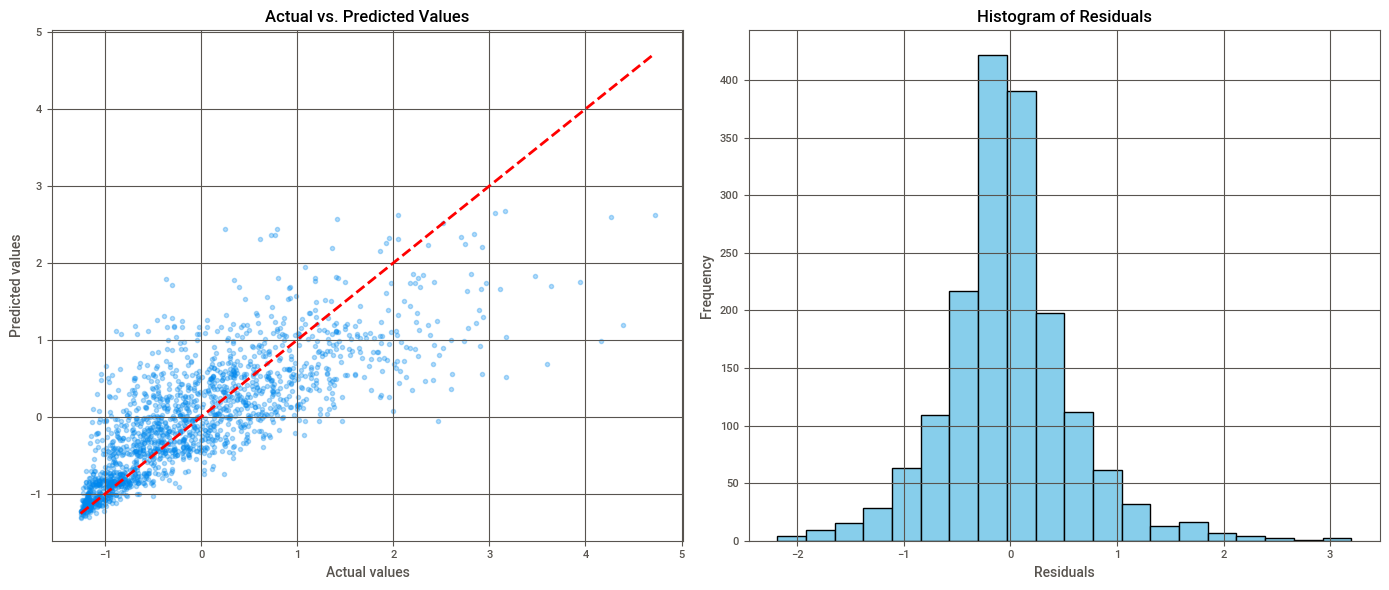

In [68]:
import matplotlib.pyplot as plt

# Assuming the best_xgb_model has been fit and is available
# Generate predictions for the holdout set
xgb_predictions = best_xgb_model.predict(X_holdout_test)

# Calculate residuals
residuals = y_holdout_test - xgb_predictions

# Set up the matplotlib figure
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Scatter plot for actual vs. predicted values
axs[0].scatter(y_holdout_test, xgb_predictions, alpha=0.3)
axs[0].plot([min(y_holdout_test), max(y_holdout_test)], [min(y_holdout_test), max(y_holdout_test)], '--r', linewidth=2)
axs[0].set_xlabel('Actual values')
axs[0].set_ylabel('Predicted values')
axs[0].set_title('Actual vs. Predicted Values')
axs[0].grid(True)

# Histogram for the residuals
axs[1].hist(residuals, bins=20, edgecolor='black', color='skyblue')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Residuals')
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# MODEL VISUALIZATION

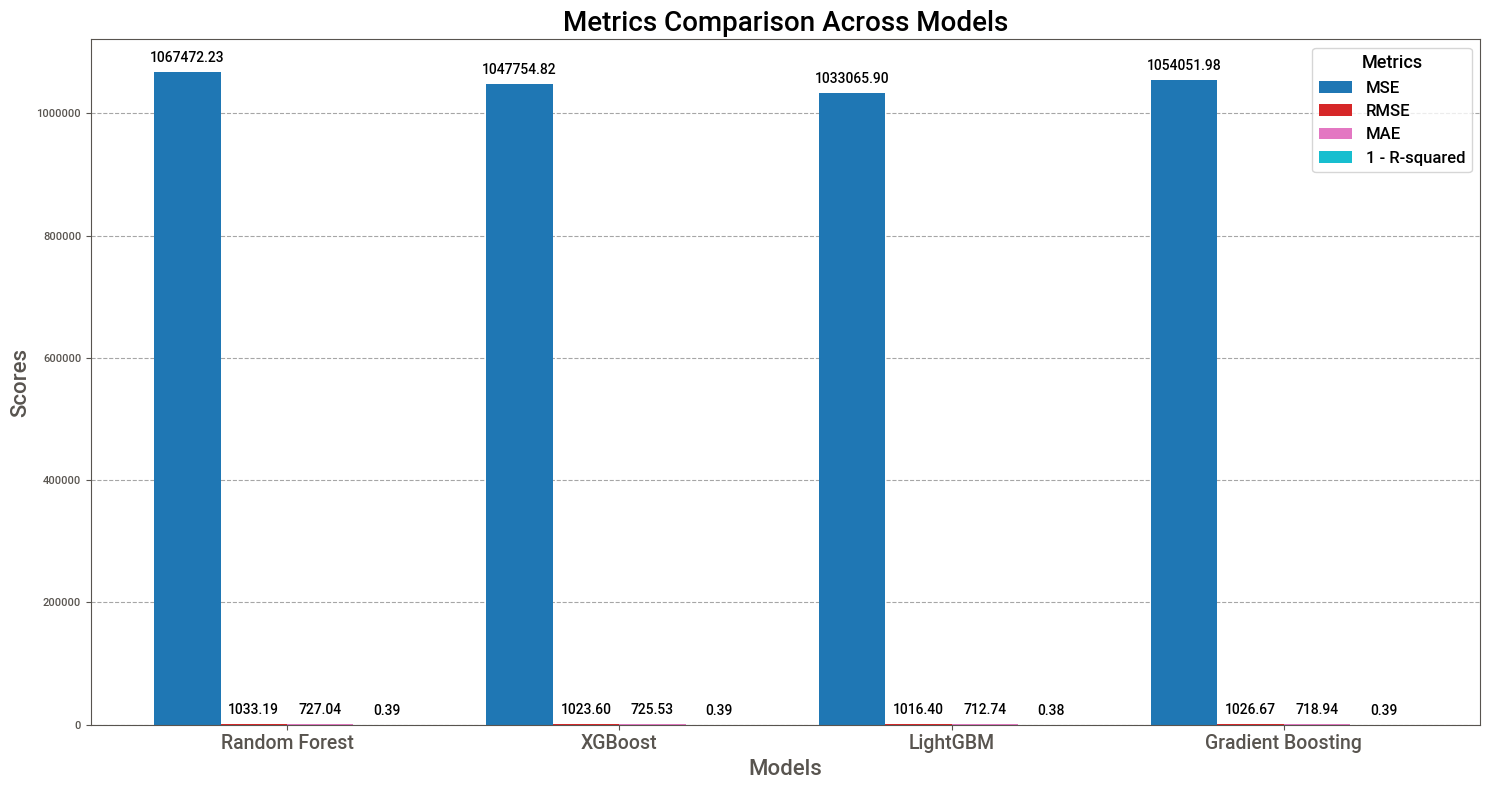

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Data from the holdout set evaluation for each model
models = ['Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting']
metrics = ['MSE', 'RMSE', 'MAE', '1 - R-squared']  # Using 1 - R-squared for uniformity
data = np.array([
    [1067472.2296311946, 1033.185476877794, 727.038866326244, 1 - 0.6072538683400719],
    [1047754.8163333233, 1023.5989528781881, 725.5346896137709, 1 - 0.6145083313454042],
    [1033065.896093397, 1016.3984927642293, 712.7428263521932, 1 - 0.619912702946233],
    [1054051.9801523695, 1026.670336647733, 718.9365986829499, 1 - 0.6121914685159011]
])

# Generating distinct colors
colors = cm.tab10(np.linspace(0, 1, len(metrics)))

n_models = len(models)
n_metrics = len(metrics)
index = np.arange(n_models)
bar_width = 0.2

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Create bars for each metric
for i in range(n_metrics):
    ax.bar(index + i * bar_width, data[:, i], bar_width, label=metrics[i], color=colors[i])

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Models', fontsize=16)
ax.set_ylabel('Scores', fontsize=16)
ax.set_title('Metrics Comparison Across Models', fontsize=20)
ax.set_xticks(index + bar_width * (n_metrics - 1) / 2)
ax.set_xticklabels(models, fontsize=14)
ax.legend(fontsize=12, title='Metrics', title_fontsize='13')

# Adding a grid for easier reading
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# Function to add value labels on the bars
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}".format(y_value)  # Format the label
        ax.annotate(
            label,                      # Use `label` as the label
            (x_value, y_value),         # Place the label at the end of the bar
            xytext=(0, space),          # Vertically shift the label by `space`
            textcoords="offset points", # Interpret `xytext` as the offset in points
            ha='center',                # Horizontally center the label
            va=va,                      # Vertically align the label differently for positive and negative values
            fontsize=10)                # Set the font size of the labels

add_value_labels(ax)

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


# CROSS VALIDATION

In [70]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform K-fold Cross-validation and calculate additional metrics
def cross_validation_metrics(model, X, y, cv, scoring):
    # Perform K-fold Cross-validation
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    
    # Convert scores to positive values (since they are negative MSE)
    scores = -scores
    
    # Calculate mean and standard deviation of the MSE
    mse_cv_mean = scores.mean()
    mse_cv_std = scores.std()
    
    # Calculate RMSE from MSE
    rmse_cv_mean = np.sqrt(mse_cv_mean)
    rmse_cv_std = np.sqrt(mse_cv_std)
    
    # Return the metrics
    return mse_cv_mean, mse_cv_std, rmse_cv_mean, rmse_cv_std

# Define number of folds
k = 5

# Calculate and print metrics for each model
print("Cross-Validation Metrics:")

# Random Forest
rf_mse_cv, rf_mse_std, rf_rmse_cv, rf_rmse_std = cross_validation_metrics(best_rf_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')
print("\nRandom Forest:")
print(f"Mean MSE: {rf_mse_cv}, Std MSE: {rf_mse_std}")
print(f"Mean RMSE: {rf_rmse_cv}, Std RMSE: {rf_rmse_std}")

# XGBoost
xgb_mse_cv, xgb_mse_std, xgb_rmse_cv, xgb_rmse_std = cross_validation_metrics(best_xgb_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')
print("\nXGBoost:")
print(f"Mean MSE: {xgb_mse_cv}, Std MSE: {xgb_mse_std}")
print(f"Mean RMSE: {xgb_rmse_cv}, Std RMSE: {xgb_rmse_std}")

# LightGBM
lgbm_mse_cv, lgbm_mse_std, lgbm_rmse_cv, lgbm_rmse_std = cross_validation_metrics(best_lgbm_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')
print("\nLightGBM:")
print(f"Mean MSE: {lgbm_mse_cv}, Std MSE: {lgbm_mse_std}")
print(f"Mean RMSE: {lgbm_rmse_cv}, Std RMSE: {lgbm_rmse_std}")

# Gradient Boosting
gb_mse_cv, gb_mse_std, gb_rmse_cv, gb_rmse_std = cross_validation_metrics(best_gb_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')
print("\nGradient Boosting:")
print(f"Mean MSE: {gb_mse_cv}, Std MSE: {gb_mse_std}")
print(f"Mean RMSE: {gb_rmse_cv}, Std RMSE: {gb_rmse_std}")

Cross-Validation Metrics:

Random Forest:
Mean MSE: 0.42215961653561873, Std MSE: 0.022786210734046363
Mean RMSE: 0.6497381138086473, Std RMSE: 0.1509510209771579

XGBoost:
Mean MSE: 0.42276039574570845, Std MSE: 0.02343960708209684
Mean RMSE: 0.6502002735663132, Std RMSE: 0.15309999047059683
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 998
[LightGBM] [Info] Number of data points in the train set: 4090, number of used features: 7
[LightGBM] [Info] Start training from score 0.018241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

# Best Model Feature Importance

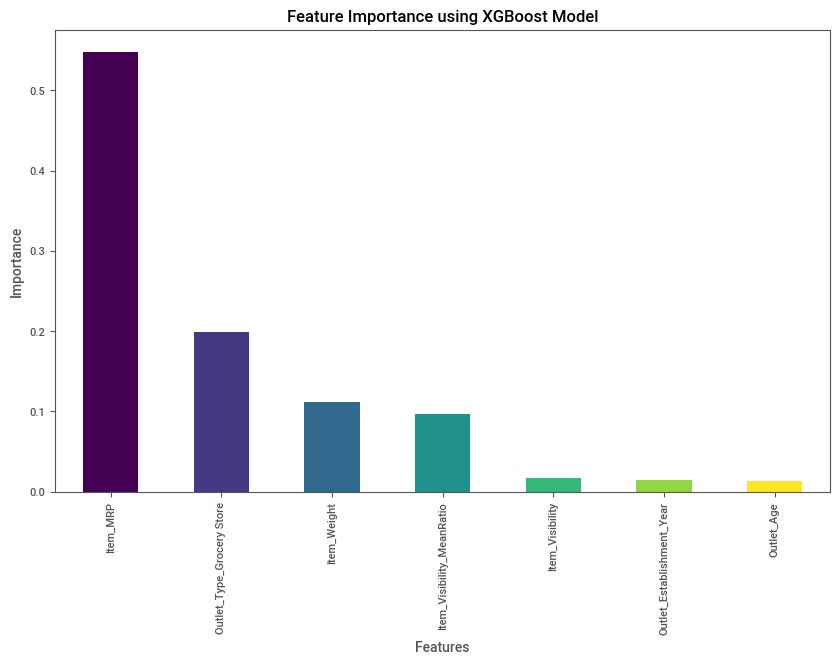

Detailed feature importance:
Item_MRP: 0.5480
Outlet_Type_Grocery Store: 0.1991
Item_Weight: 0.1123
Item_Visibility_MeanRatio: 0.0964
Item_Visibility: 0.0166
Outlet_Establishment_Year: 0.0141
Outlet_Age: 0.0135


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming best_xgb_model is already defined and initialized as per your code context

# Define the feature names, ensuring they match the features used to train the model
feature_names = [
    'Outlet_Type_Grocery Store',
    'Item_MRP',
    'Outlet_Age',
    'Outlet_Establishment_Year',
    'Item_Visibility',
    'Item_Visibility_MeanRatio',
    'Item_Weight'
]

# Get the feature importances from the model
feature_importances = best_xgb_model.feature_importances_

# Create a pandas Series for easy plotting
importances_series = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance
sorted_importances = importances_series.sort_values(ascending=False)

# Assigning colors to each tile
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_importances)))

# Plot the feature importances with different colors for each tile
plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar', color=colors)
plt.title('Feature Importance using XGBoost Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Detailing the feature importance
print("Detailed feature importance:")
for name, importance in sorted_importances.items():
    print(f"{name}: {importance:.4f}")


In [72]:
import pandas as pd

# Detailed feature importance data
detailed_feature_importance = {
    'Feature': ['Item_MRP', 'Outlet_Type_Grocery Store', 'Item_Weight', 'Item_Visibility_MeanRatio', 
                'Item_Visibility', 'Outlet_Establishment_Year', 'Outlet_Age'],
    'Importance': [0.5480, 0.1991, 0.1123, 0.0964, 0.0166, 0.0141, 0.0135]
}

# Create DataFrame
df_feature_importance = pd.DataFrame(detailed_feature_importance)

# Display DataFrame
display(df_feature_importance)


,Feature,Importance
0,Item_MRP,0.5480
1,Outlet_Type_Grocery Store,0.1991
2,Item_Weight,0.1123
3,Item_Visibility_MeanRatio,0.0964
4,Item_Visibility,0.0166
5,Outlet_Establishment_Year,0.0141
6,Outlet_Age,0.0135


Item_MRP (Maximum Retail Price): The prominence of the MRP, with an importance score of 0.5480, underscores its pivotal role in influencing consumer demand. The price point is often a primary consideration for customers, affecting both their perception of value and their purchasing power. A higher MRP may correspond to perceived quality and brand prestige which can attract a segment of customers less sensitive to price changes, thus affecting the price-demand curve. Conversely, competitively priced items might appeal to cost-conscious consumers, potentially increasing sales volumes. Retailers can use this insight to refine pricing strategies, perhaps employing price discrimination or dynamic pricing to maximize revenue.

Outlet_Type_Grocery Store: Different retail formats can significantly sway product demand, as evidenced by the importance score of 0.1991 for grocery stores. These outlets typically cater to routine, immediate needs, leading to frequent purchases of smaller quantities. The demand in grocery stores may be less sensitive to price fluctuations compared to larger retail formats where customers expect competitive pricing. Retailers can leverage this understanding to adjust prices according to the type of outlet to capitalize on consumer behavior and demand patterns.

Item_Weight: The weight of a product, with an importance score of 0.1123, can have a multifaceted impact on demand. Heavier items may incur higher transportation costs, which can translate to higher shelf prices. In contrast, lighter items may be cheaper to transport and stock, possibly allowing for more aggressive pricing. The demand might be inversely related to the weight in scenarios where convenience is a deciding factor for the consumer. Retailers might consider this when determining pricing structures to ensure they align with consumer expectations and willingness to pay.

Item_Visibility_MeanRatio: Visibility relative to other products, indicated by a score of 0.0964, can drive demand by increasing the likelihood of a product catching a consumer's eye. Products that stand out compared to their peers might command a premium as their perceived value increases with visibility. Retailers might adjust prices upward for highly visible items, especially if they are positioned as premium options, or use strategic visibility to push higher-margin or high-volume products.

Item_Visibility: The absolute visibility of a product, albeit with a lower score of 0.0166, still affects demand. Products that are not easily seen may be overlooked by consumers, potentially leading to decreased demand and necessitating lower prices to stimulate sales. Retailers can use this insight to employ strategic product placement, ensuring that key items are visible and attractively priced to encourage purchases.

Outlet_Establishment_Year: The establishment year of the outlet has a minimal importance score of 0.0141, implying it has a limited direct effect on pricing and demand. However, it may be a proxy for other factors such as outlet location and customer loyalty, which can indirectly influence pricing strategies and consumer demand.

Outlet_Age: Similarly, the age of the outlet, with a score of 0.0135, suggests a small direct influence on demand. The age might reflect the store's lifecycle stage, with older stores potentially having established customer bases that could be less price-sensitive due to brand loyalty or convenience factors.

In [73]:
pip install shap

 99%|===================| 5068/5113 [01:18<00:00]        

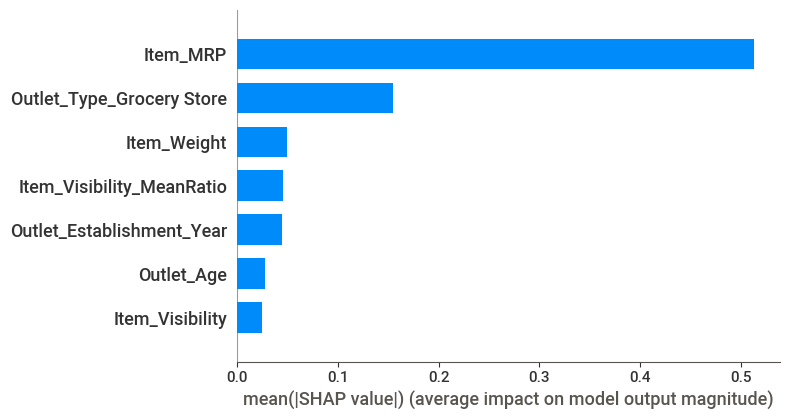

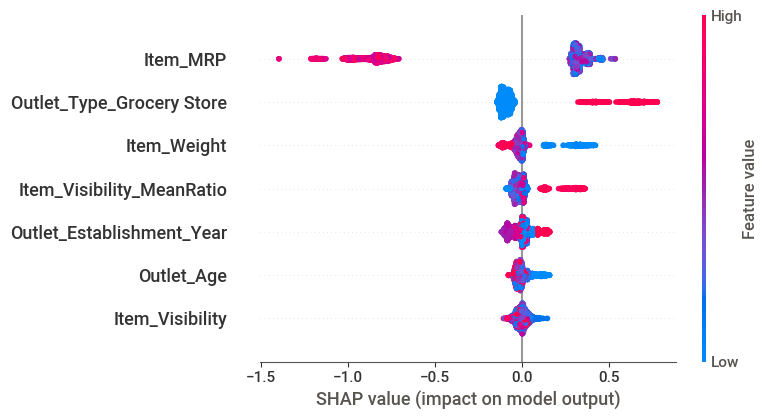

In [74]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train and best_gb_model are already defined and initialized as per your code context

# Define the feature names
feature_names = [
    'Outlet_Type_Grocery Store',
    'Item_MRP',
    'Outlet_Age',
    'Outlet_Establishment_Year',
    'Item_Visibility',
    'Item_Visibility_MeanRatio',
    'Item_Weight'
]

# Convert the training set to DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Initialize the explainer with the best GradientBoostingRegressor model
explainer = shap.Explainer(best_gb_model, X_train_df)

# Calculate SHAP values
shap_values = explainer(X_train_df)

# Plot SHAP summary bar plot for feature importance
shap.summary_plot(shap_values, X_train_df, plot_type='bar')
plt.show()  

# Plot SHAP summary dot plot for individual feature effects
shap.summary_plot(shap_values, X_train_df, plot_type='dot')
plt.show() 

In [75]:
pip install pandas statsmodels scikit-learn

Note: you may need to restart the kernel to use updated packages.


# SAVING THE MODELS FOR FLASK DEPLOYMENT

In [76]:
import joblib

# ... (rest of your code for training and evaluating models) ...

# Assuming the best model is stored in a variable named `best_gb_model`
model_directory = r'C:\Users\Dell\ML MODEL DEPLOYMENT'  # Use a raw string for the file path
model_filename = 'best_gb_model.pkl'
model_path = f"{model_directory}\\{model_filename}"  # Full path to the model

# Save the best model to the specified directory
joblib.dump(best_gb_model, model_path)

# Print the name and path of the saved model
print(f"Model saved successfully at {model_path}")

# To load the model later you can use:
# best_gb_model_loaded = joblib.load(model_path)

Model saved successfully at C:\Users\Dell\ML MODEL DEPLOYMENT\best_gb_model.pkl


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# ... (rest of your code for training and evaluating models) ...

# Save the best model
# You must determine which model is best based on the evaluation metrics above
# Assuming the best model is `best_gb_model` for this example
model_filename = 'best_gb_model.pkl'
joblib.dump(best_gb_model, model_filename)

# Print the name of the saved model
print(f"Model saved successfully as {model_filename}")

# To load the model later you can use:
# best_gb_model_loaded = joblib.load(model_filename)

Model saved successfully as best_gb_model.pkl


# MODEL DEPLOYMENT TO FLASK

In [78]:
pip install Flask-HTTPAuth

Note: you may need to restart the kernel to use updated packages.


In [79]:
!pip install flask

# Load Flask and Define Routes

# BackEnd app.py

In [80]:
from flask import Flask, render_template, request
import joblib
import numpy as np

app = Flask(__name__)

# Load the model
best_gb_model = joblib.load('best_gb_model.pkl')

# Define a route for the home page
@app.route('/')
def home():
    return render_template('home.html')

# Route to render the predict form
@app.route('/predict', methods=['GET'])
def predict_form():
    return render_template('predict.html')

# Endpoint for prediction
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the necessary features from the form
        features = [
            float(request.form['item_visibility']),  # 'Item_Visibility'
            float(request.form['item_visibility_meanratio']),  # 'Item_Visibility_MeanRatio'
            float(request.form['item_weight']),  # 'Item_Weight'
            float(request.form['item_mrp']),  # 'Item_MRP'
            2024 - int(request.form['outlet_establishment_year']),  # 'Outlet_Age'
            int(request.form['outlet_establishment_year']),  # 'Outlet_Establishment_Year'
            int(request.form['outlet_type_grocery_store']),  # 'Outlet_Type_Grocery_Store'
        ]
        
        # Convert features to a numpy array
        features_array = np.array(features).reshape(1, -1)
        
        # Predict using the best gb model
        prediction = best_gb_model.predict(features_array)[0]
        
        # Render the result template with the prediction
        return render_template('result.html', prediction=prediction)
    except ValueError as e:
        # Return an error message
        return f"An error occurred: {e}"

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

To exit: use 'exit', 'quit', or Ctrl-D.


# FrontEnd Prediction.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Predict Sales</title>
</head>
<body>
    <h1>Prediction Form</h1>
    <form action="/predict" method="post">
        <label for="outlet_type_grocery_store">Outlet Type Grocery Store:</label>
        <input type="radio" id="outlet_type_grocery_store_0" name="outlet_type_grocery_store" value="0" required> No
        <input type="radio" id="outlet_type_grocery_store_1" name="outlet_type_grocery_store" value="1" required> Yes<br><br>

        <label for="item_mrp">Item MRP:</label>
        <input type="number" step="any" id="item_mrp" name="item_mrp" required><br><br>

        <label for="outlet_establishment_year">Outlet Establishment Year:</label>
        <input type="number" id="outlet_establishment_year" name="outlet_establishment_year" required><br><br>

        <label for="item_visibility">Item Visibility:</label>
        <input type="number" step="any" id="item_visibility" name="item_visibility" required><br><br>

        <label for="item_visibility_meanratio">Item Visibility Mean Ratio:</label>
        <input type="number" step="any" id="item_visibility_meanratio" name="item_visibility_meanratio" required><br><br>

        <label for="item_weight">Item Weight:</label>
        <input type="number" step="any" id="item_weight" name="item_weight" required><br><br>

        <button type="submit">Predict</button>
    </form>
</body>
</html>